Group 2 - Python Notebook

In [81]:
from Dataset import Preprocessing
from Model.mnb import MultinomialNaiveBayes
from Utils.utils import *

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Import data

In [82]:

data_processing = Preprocessing()
reviews_df, wines_df, users_df, full_df = data_processing.get_dataset()

Reading data...
Creating labels...
Balancing data, downsampling.. 
Cleaning data...
Tokenizing data...


C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:23: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.full_df = pd.read_csv(path + "\\full_dataset.csv")
C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The

In [83]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350501 entries, 865929 to 795787
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1350501 non-null  object 
 1   Year         1316890 non-null  object 
 2   Wine ID      1350501 non-null  int64  
 3   User Rating  1350501 non-null  float64
 4   Note         1350491 non-null  object 
 5   CreatedAt    1350501 non-null  object 
 6   User         1350491 non-null  object 
 7   Winery       1350501 non-null  object 
 8   Rating       1350501 non-null  float64
 9   Country      1350501 non-null  object 
 10  Region       1349467 non-null  object 
 11  Price        1350501 non-null  float64
 12  Sentiment    1350501 non-null  int64  
 13  Cleaned      1350501 non-null  object 
 14  Tokenized    1350501 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 164.9+ MB


In [84]:
reviews_df.info(), wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630246 entries, 0 to 1630245
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1630246 non-null  object 
 1   Year         1589277 non-null  object 
 2   Wine ID      1630246 non-null  int64  
 3   User Rating  1630246 non-null  float64
 4   Note         1630236 non-null  object 
 5   CreatedAt    1630246 non-null  object 
 6   User         1630236 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 87.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1798 non-null   object 
 1   Year        1794 non-null   object 
 2   Wine ID     1798 non-null   int64  
 3   Wine        1798 non-null   object 
 4   Rating      1798 non-null   float64
 5   num_review  1798 non-null   int

(None, None)

In [85]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49297 entries, 0 to 49296
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         49297 non-null  object
 1   Bio          8886 non-null   object
 2   UserCountry  49297 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


Data Visualization

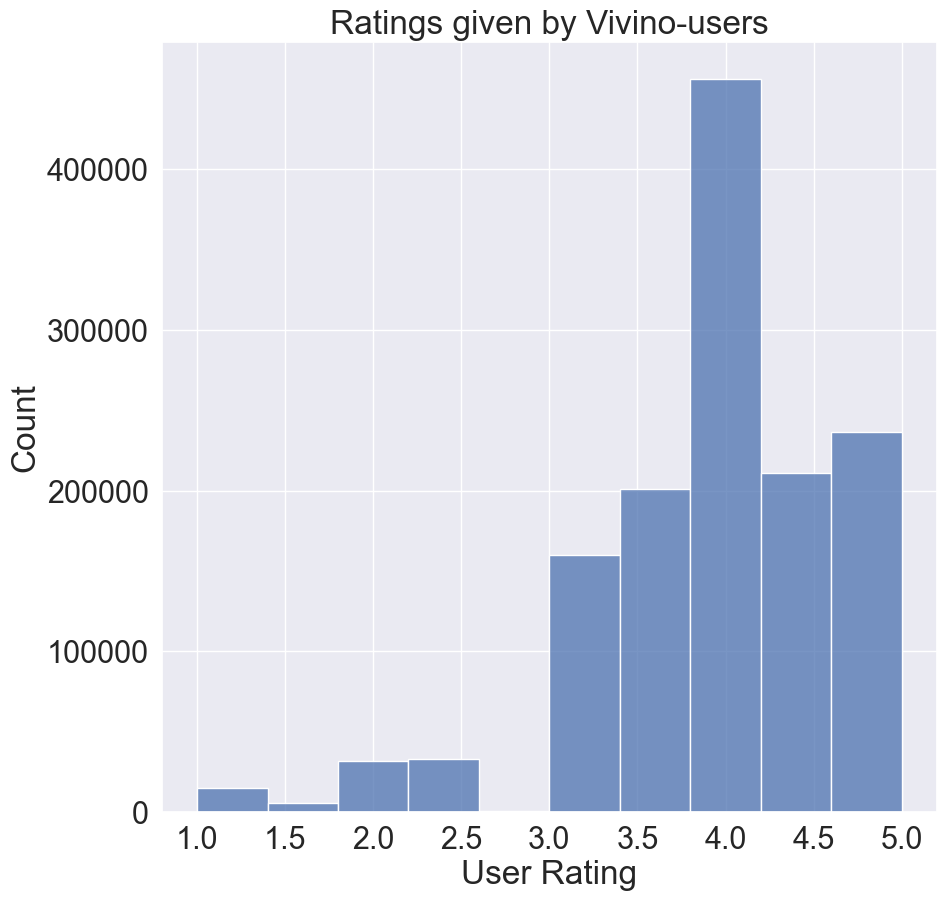

In [86]:
sns.histplot(full_df["User Rating"], bins=10, kde=False).set(title='Ratings given by Vivino-users')
sns.set(rc={'figure.figsize':(100,5)})

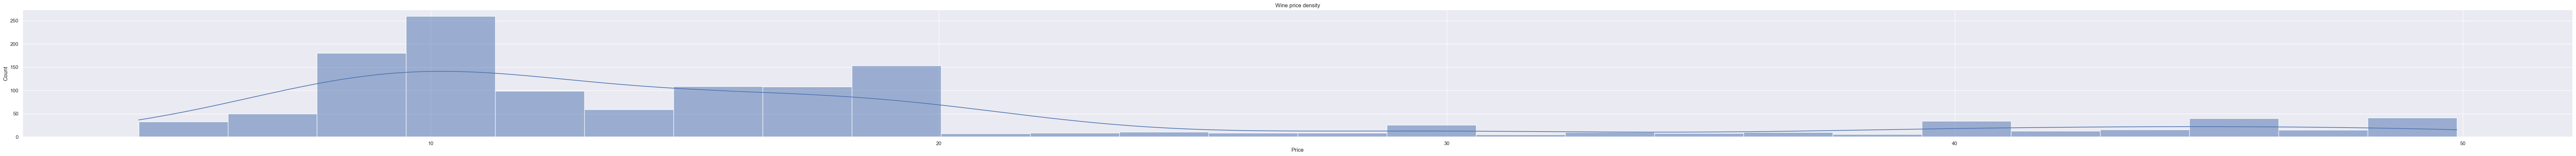

In [87]:
df = wines_df[wines_df.Price<50].sort_values('Price')
bins =  np.arange(0, 50.0, 2)
#plt.hist(df['Price'], bins)
sns.histplot(data=df['Price'], kde=True).set(title='Wine price density')
sns.set(rc={'figure.figsize':(20,20)})

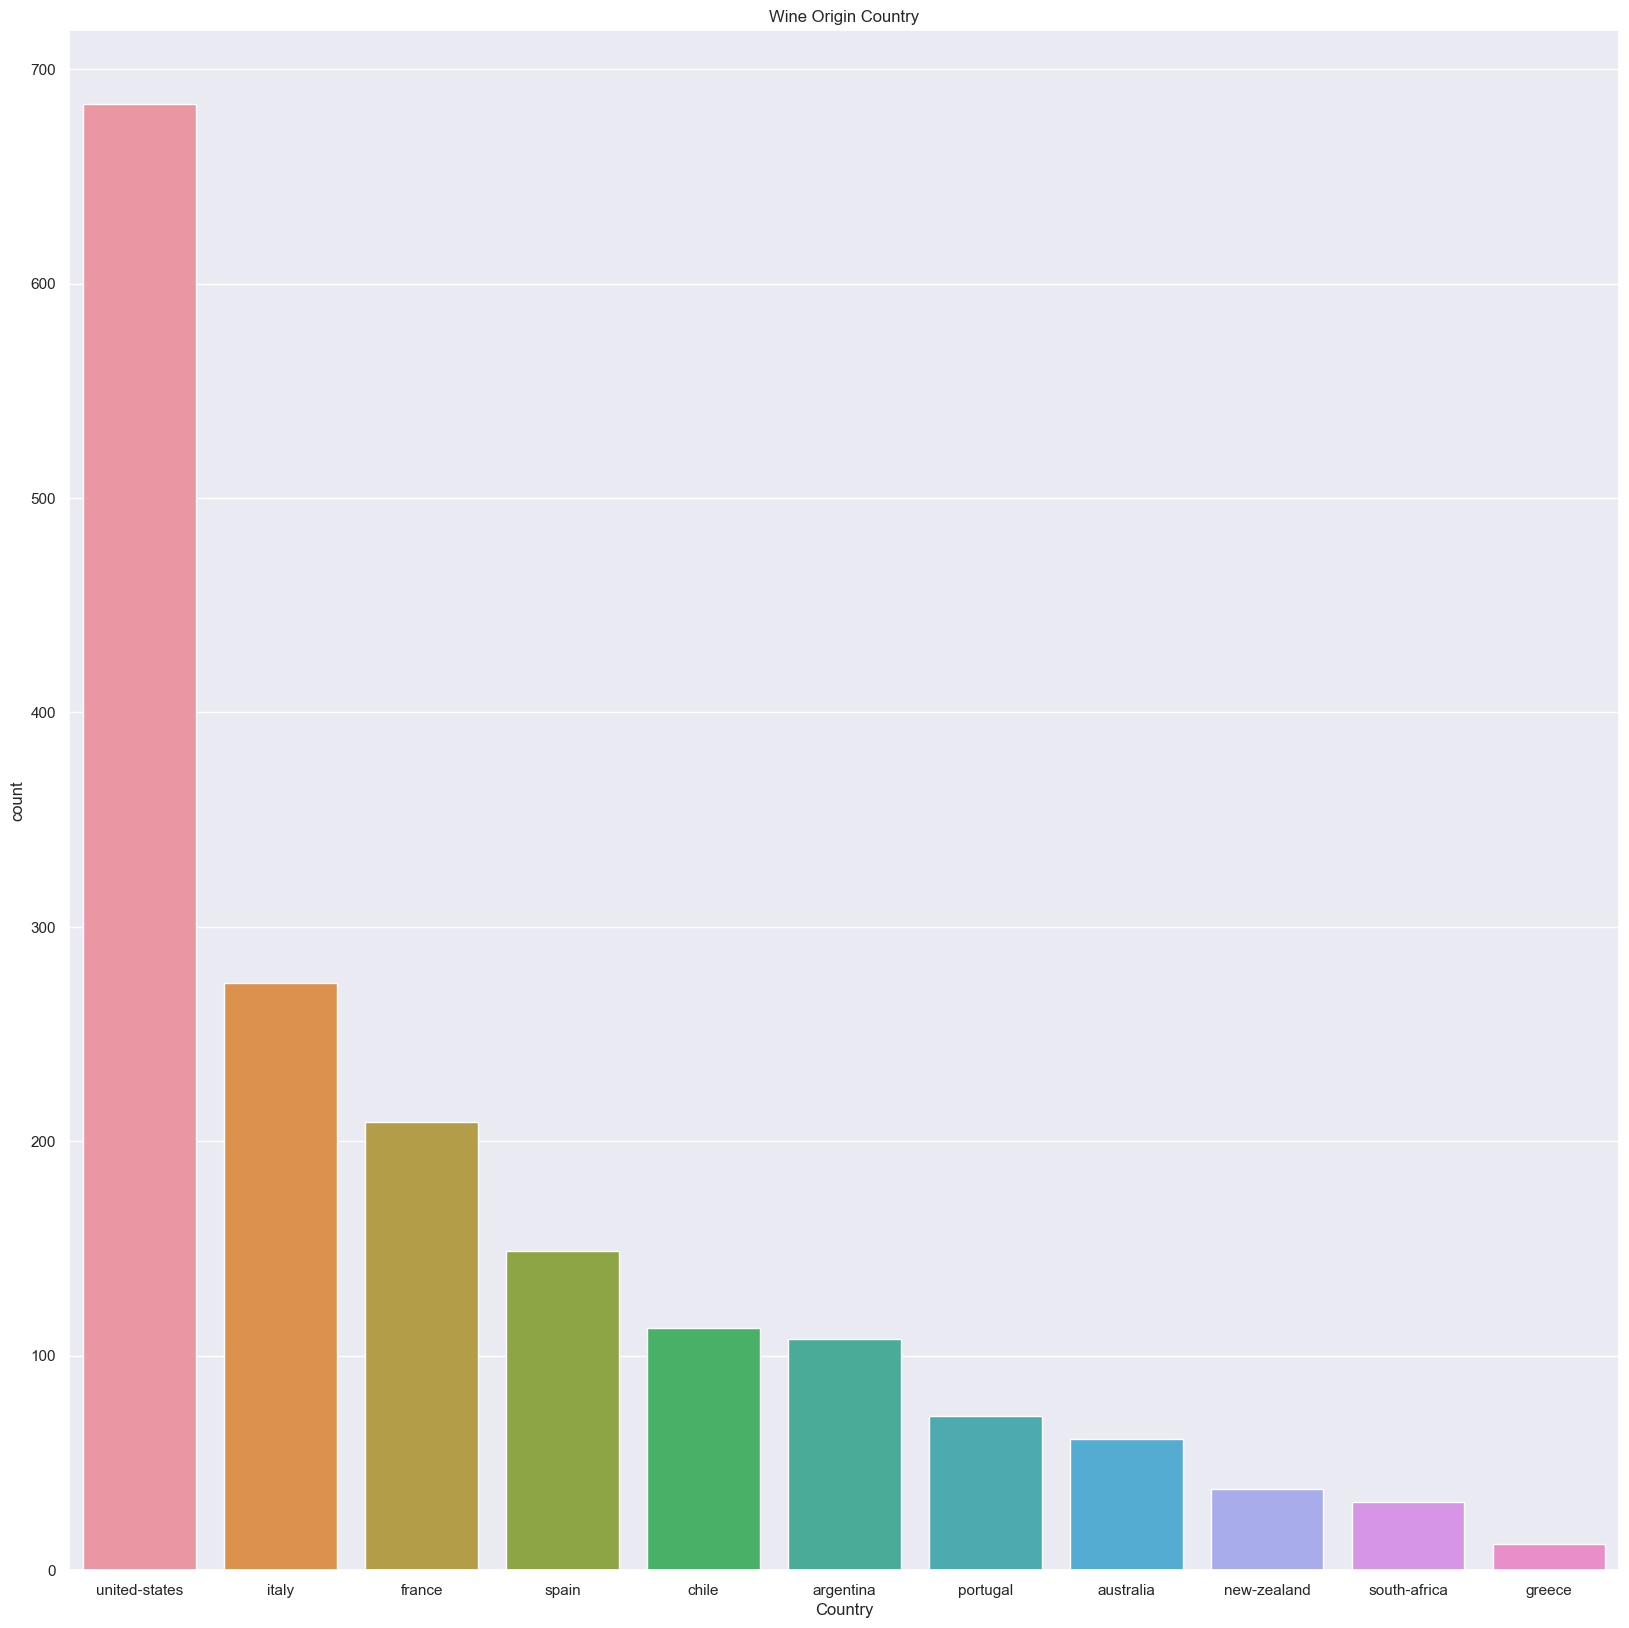

In [88]:
sns.countplot(x = wines_df["Country"], order = wines_df["Country"].value_counts().iloc[:11].index).set(title='Wine Origin Country')
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

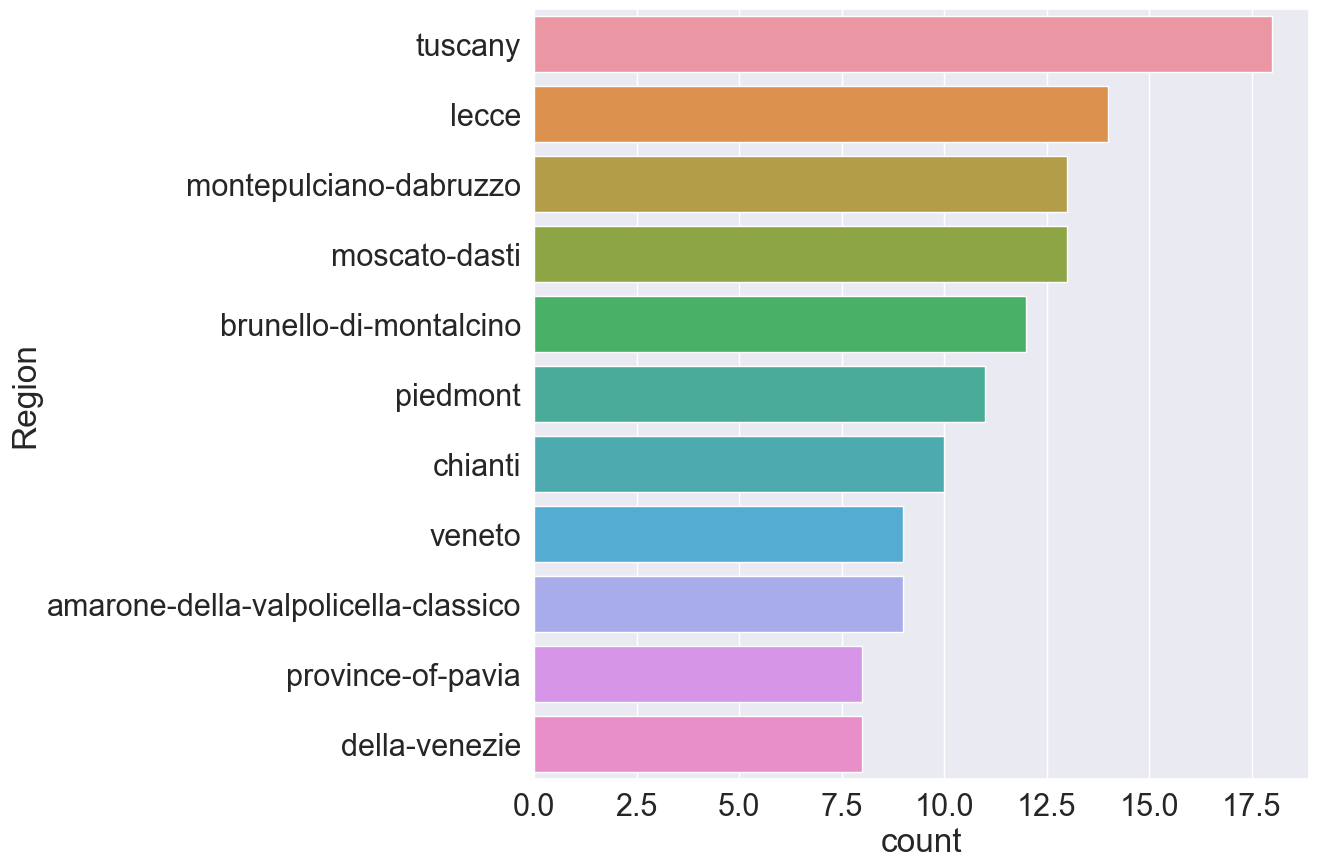

In [89]:
sns.countplot(y = wines_df[wines_df['Country']=='italy']["Region"], order = wines_df[wines_df['Country']=='italy']["Region"].value_counts().iloc[:11].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 2)

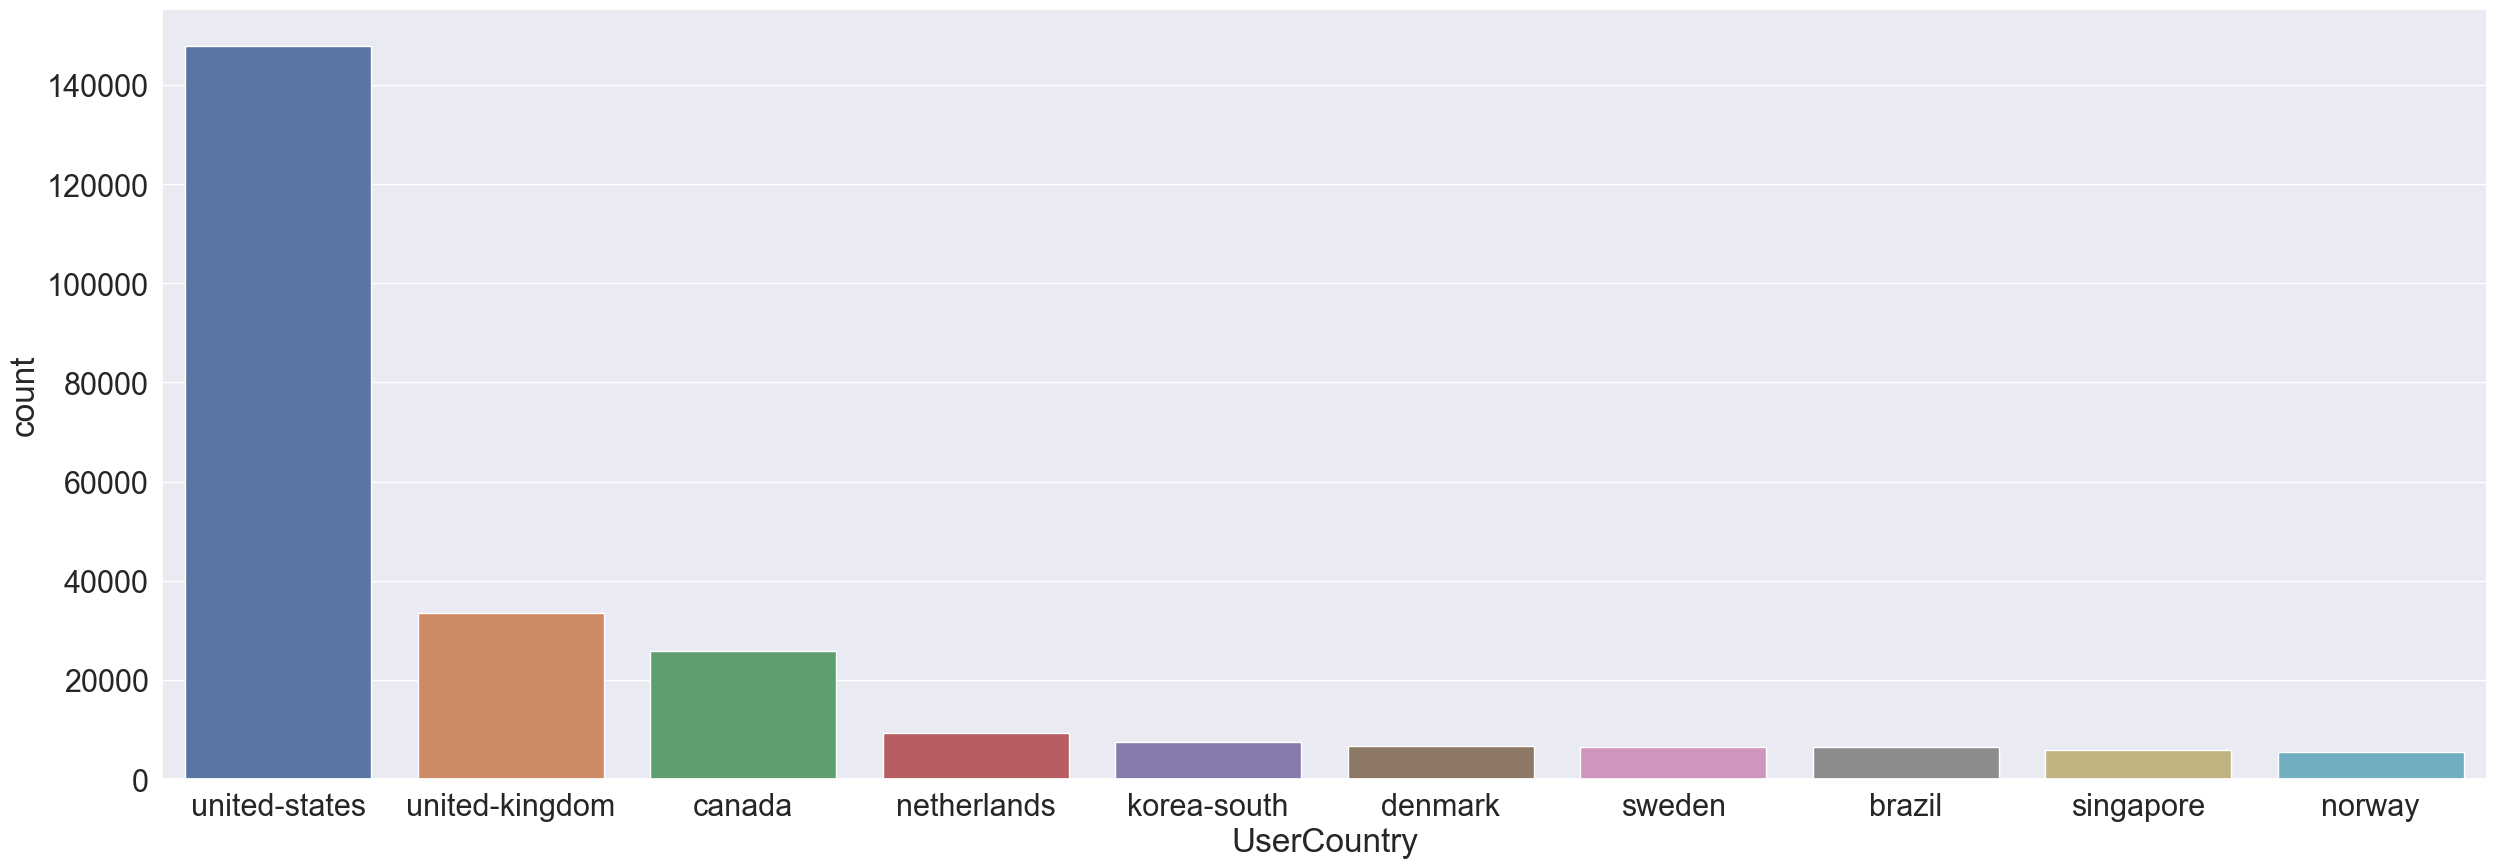

In [90]:
df_users = full_df.merge(users_df,on="User",how='outer')
df_users = df_users[df_users['UserCountry'].notna()]
sns.countplot(x = df_users["UserCountry"], order = df_users["UserCountry"].value_counts().iloc[:10].index)
sns.set(rc={'figure.figsize':(30, 15)}, font_scale = 2)

<AxesSubplot: xlabel='Price', ylabel='count'>

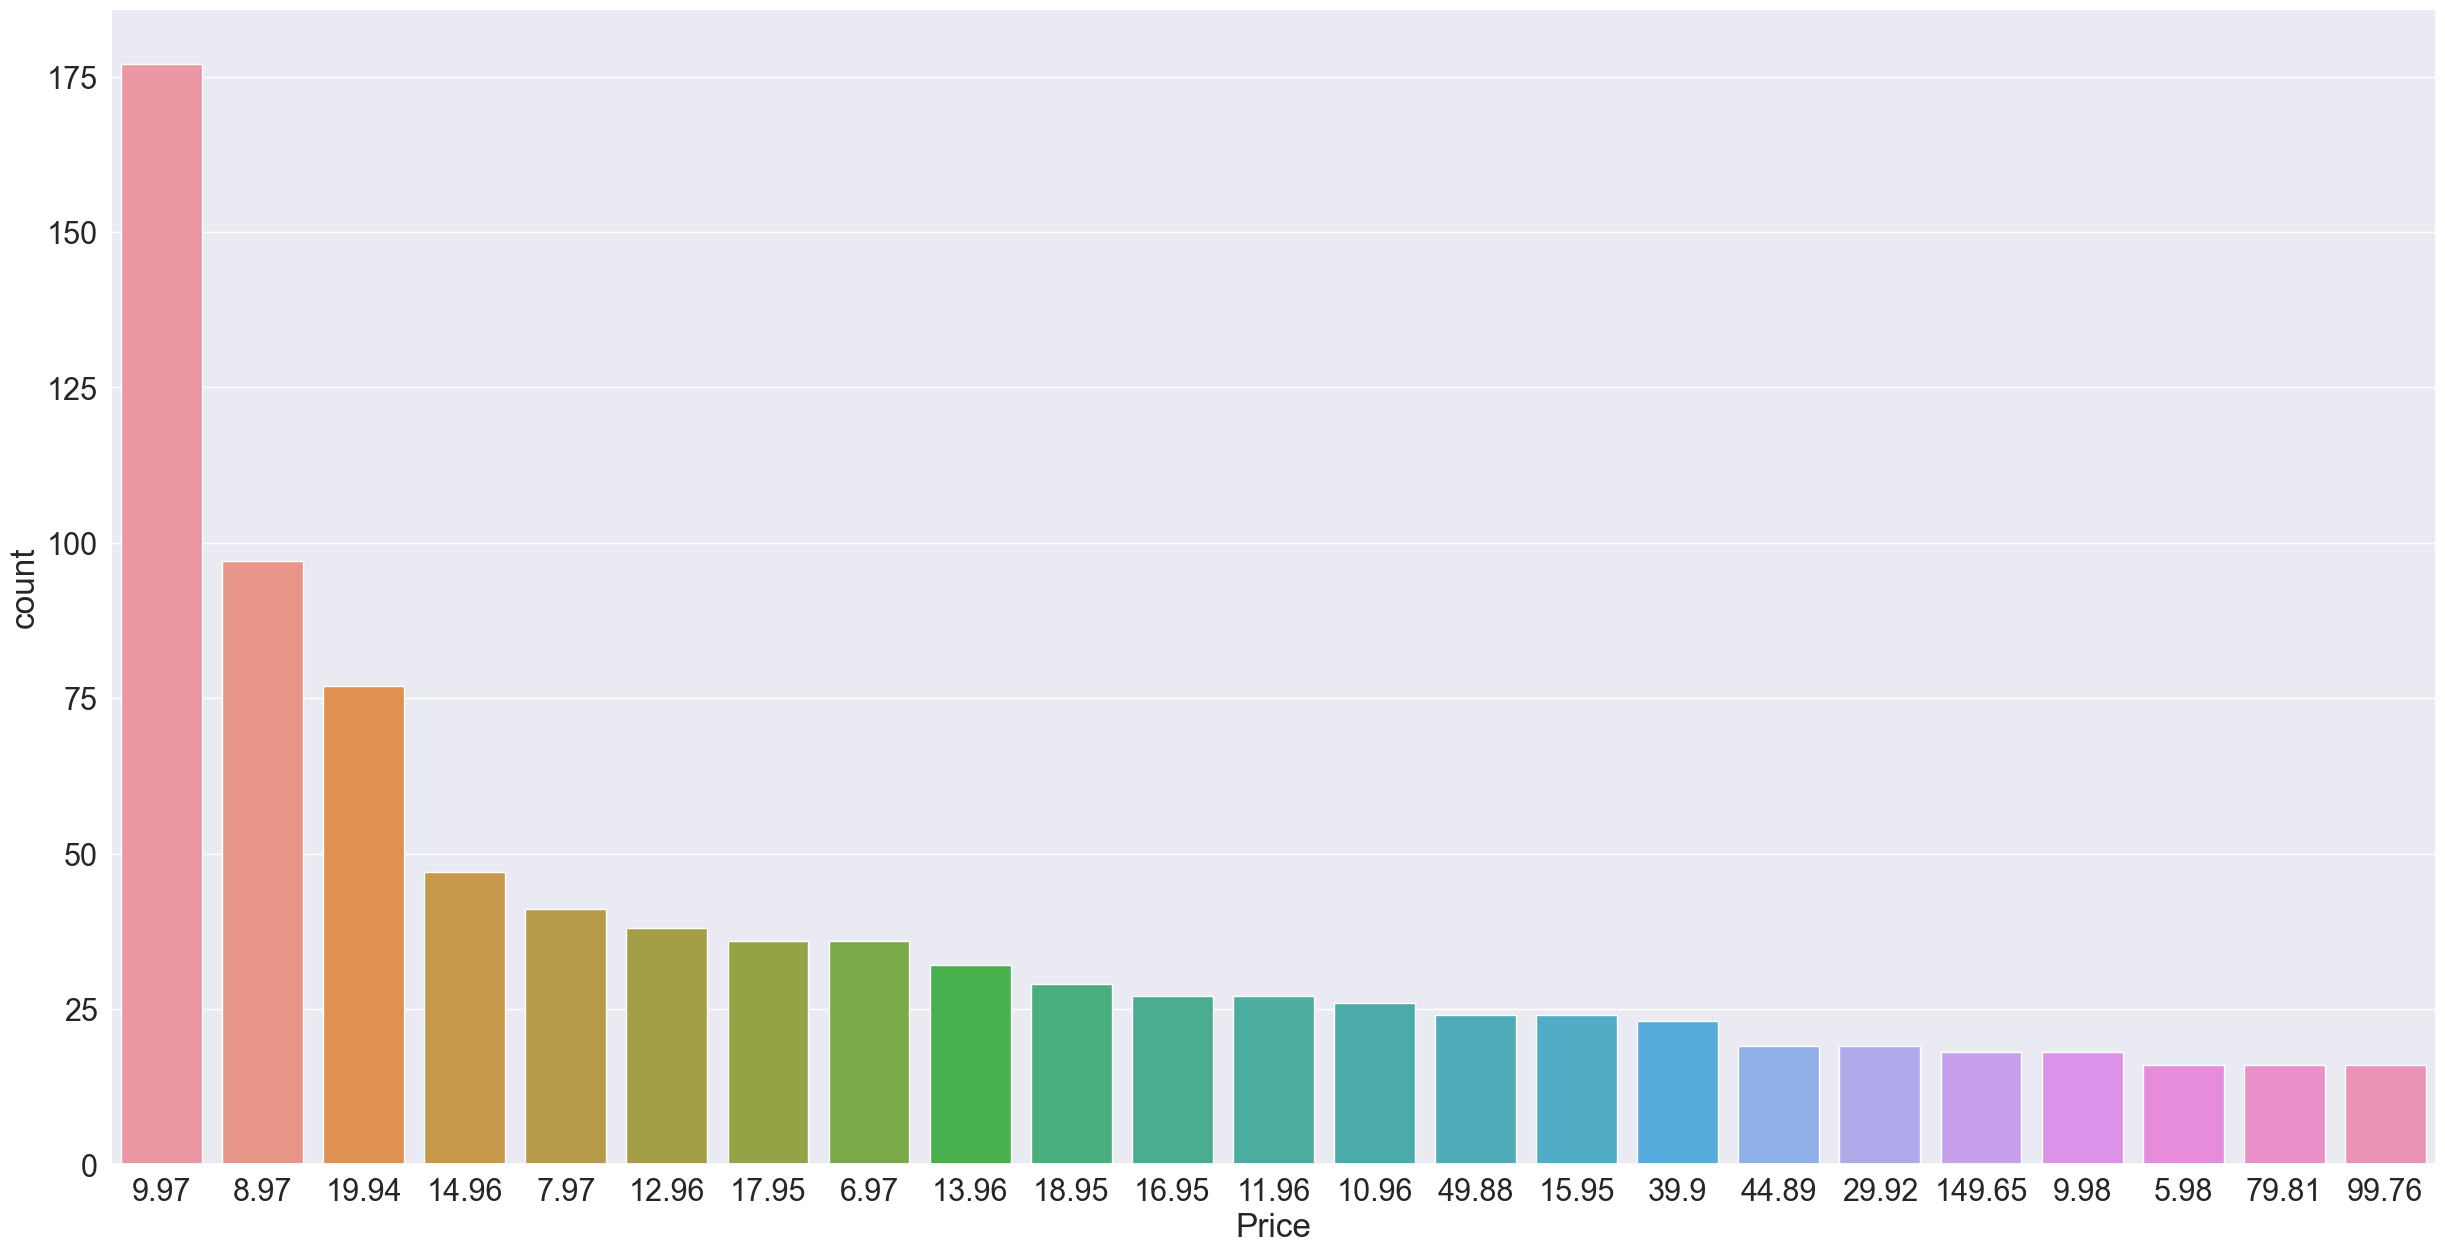

In [91]:
df_price = round(wines_df["Price"],2)
sns.countplot(x = df_price, order = df_price.value_counts().iloc[:23].index)

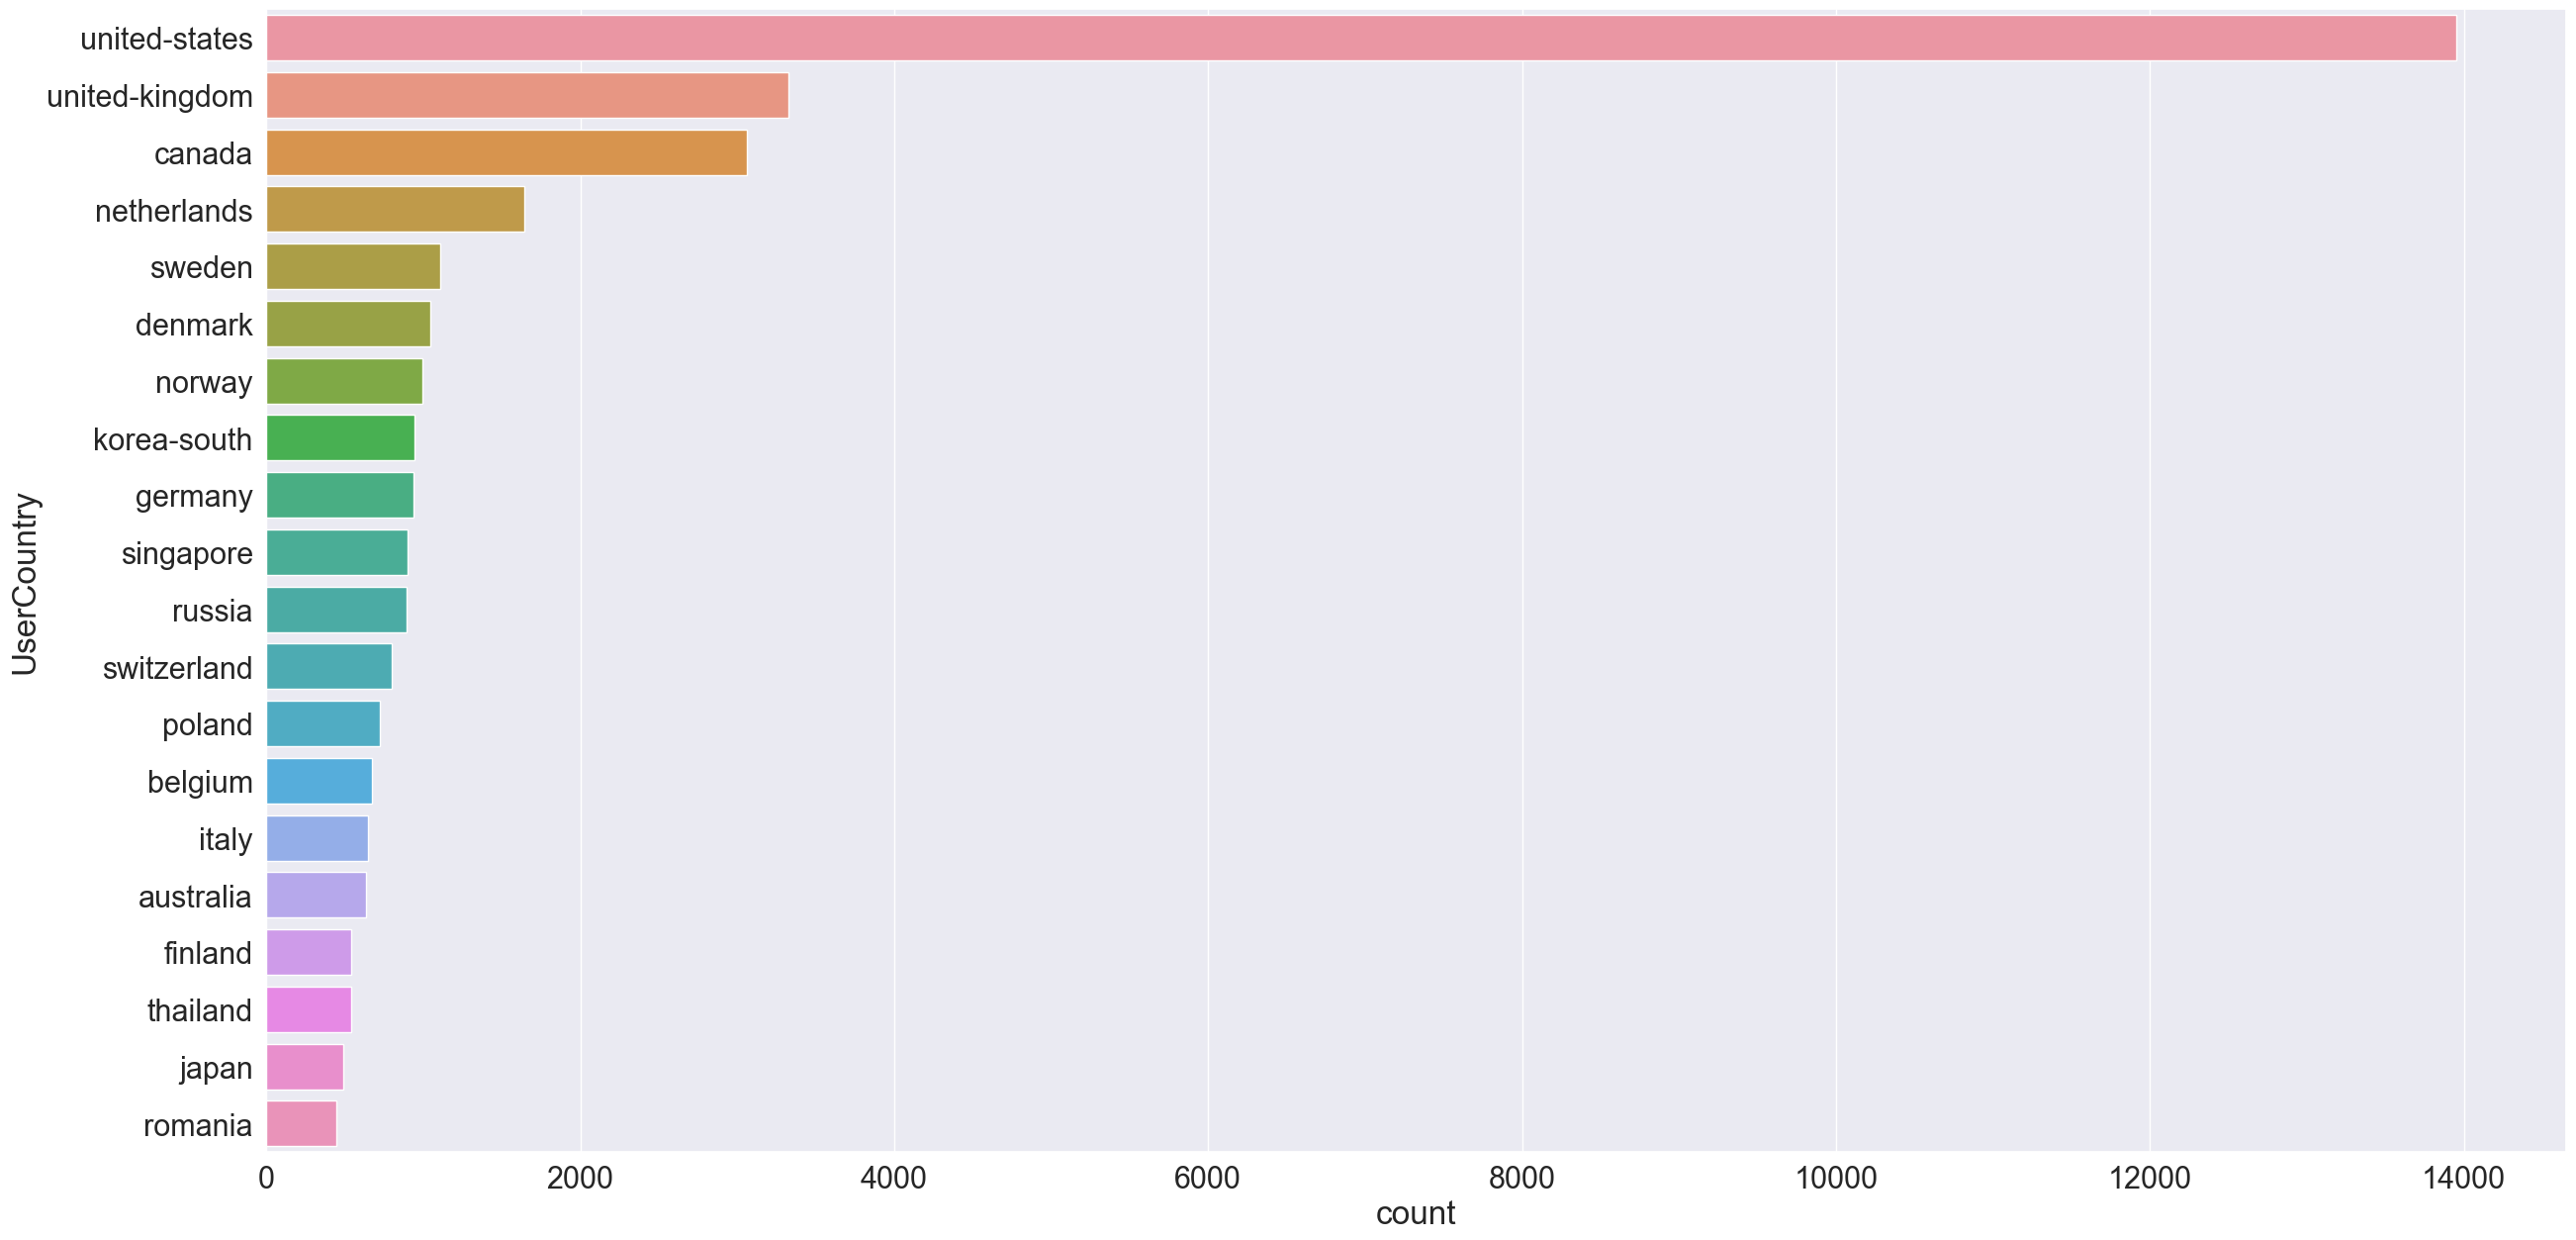

In [92]:
sns.countplot(y = df_users[df_users['Country']=='italy']['UserCountry'], order = df_users[df_users['Country']=='italy']['UserCountry'].value_counts().iloc[:20].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 3)




Rating distribution - Sentiment

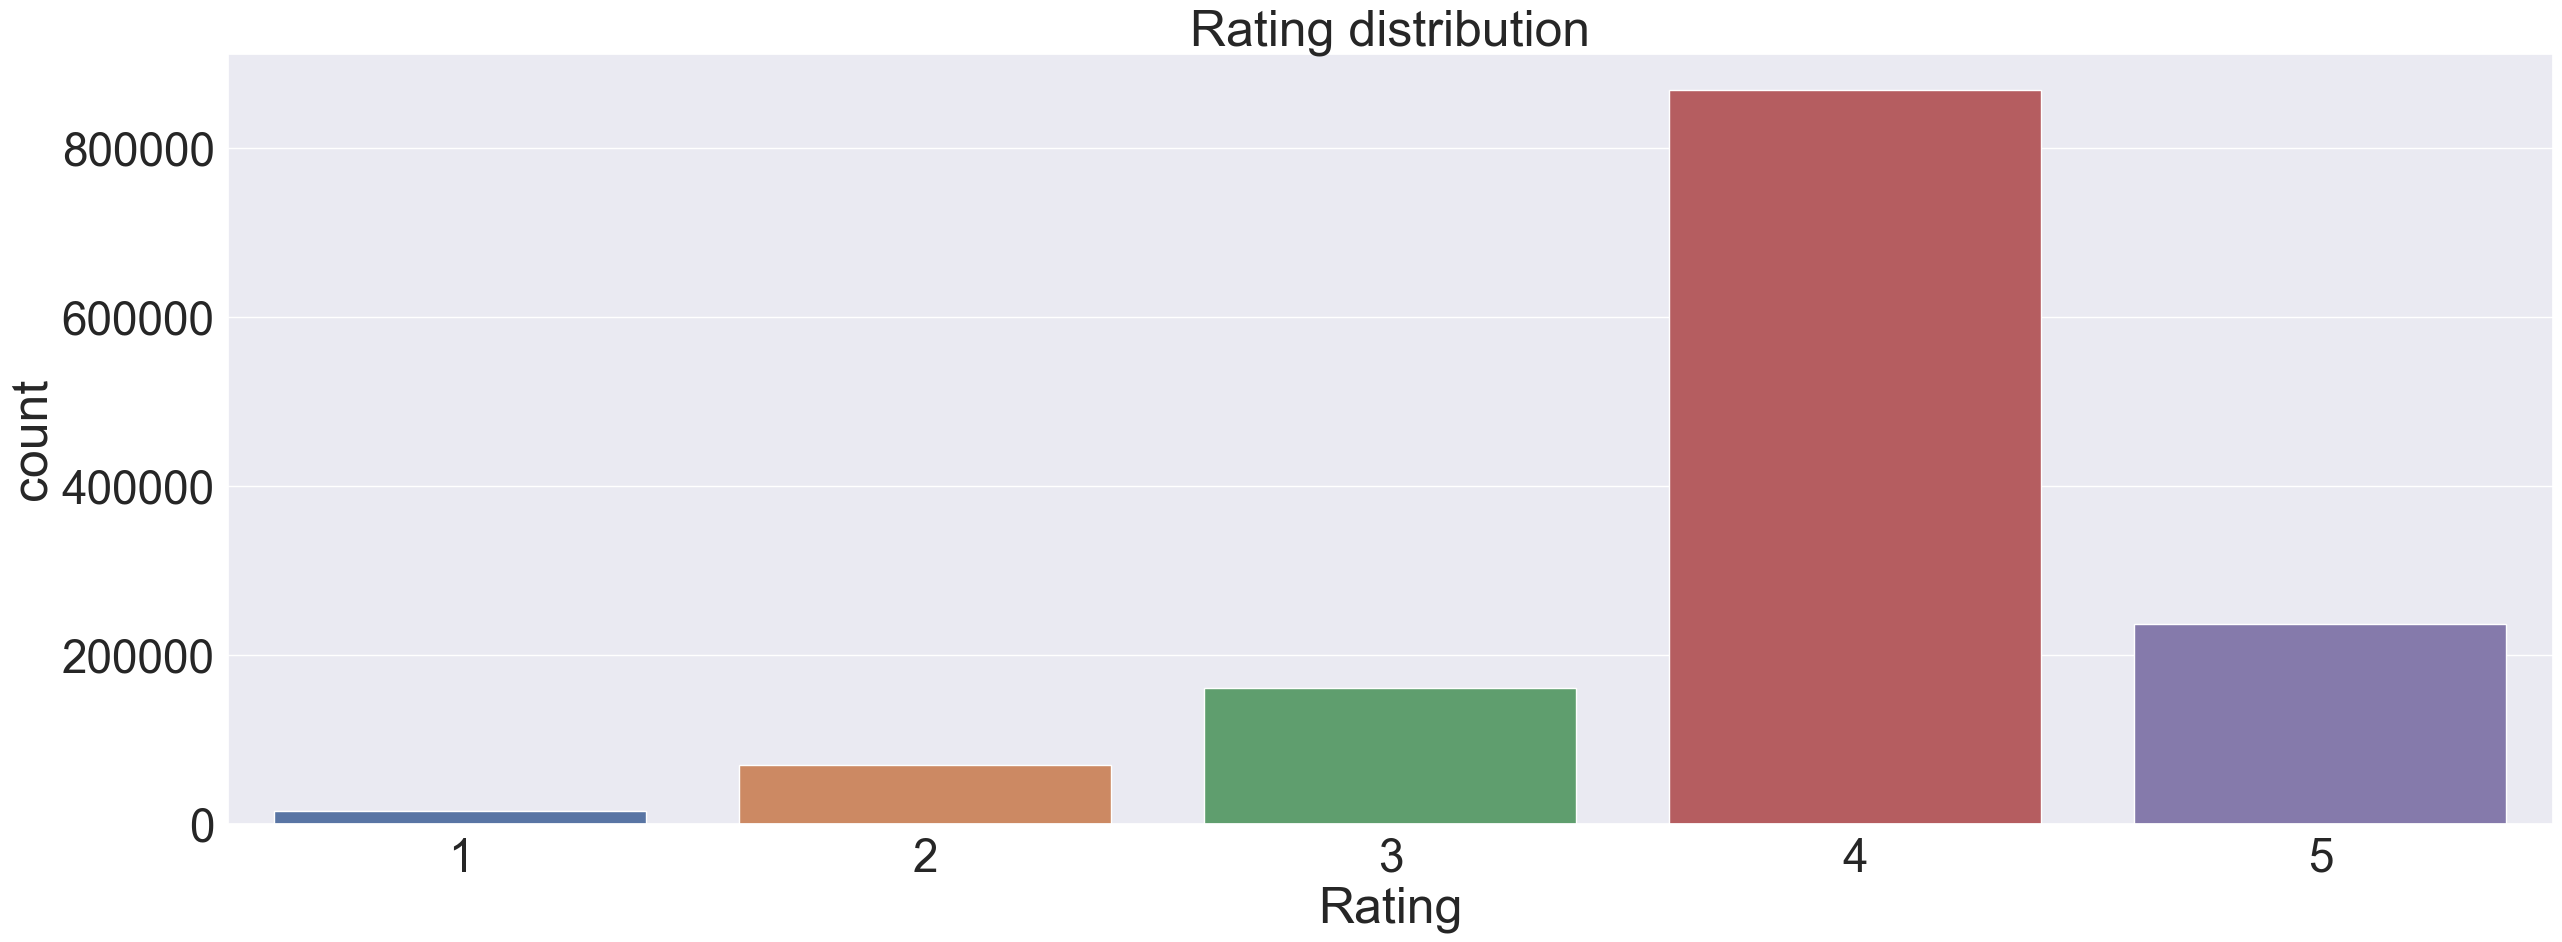

In [93]:
full_df["int_Rating"] = full_df["User Rating"].apply(round)

f = sns.countplot(x='int_Rating', data=full_df)
f.set_title("Rating distribution")
plt.xlabel("Rating");

In [94]:
neg = full_df[full_df["User Rating"]<4].Wine.count()
pos = full_df[full_df["User Rating"]>4].Wine.count()
neutr = pos = full_df[full_df["User Rating"]==4].Wine.count()

neg, neutr,pos

(450167, 450167, 450167)

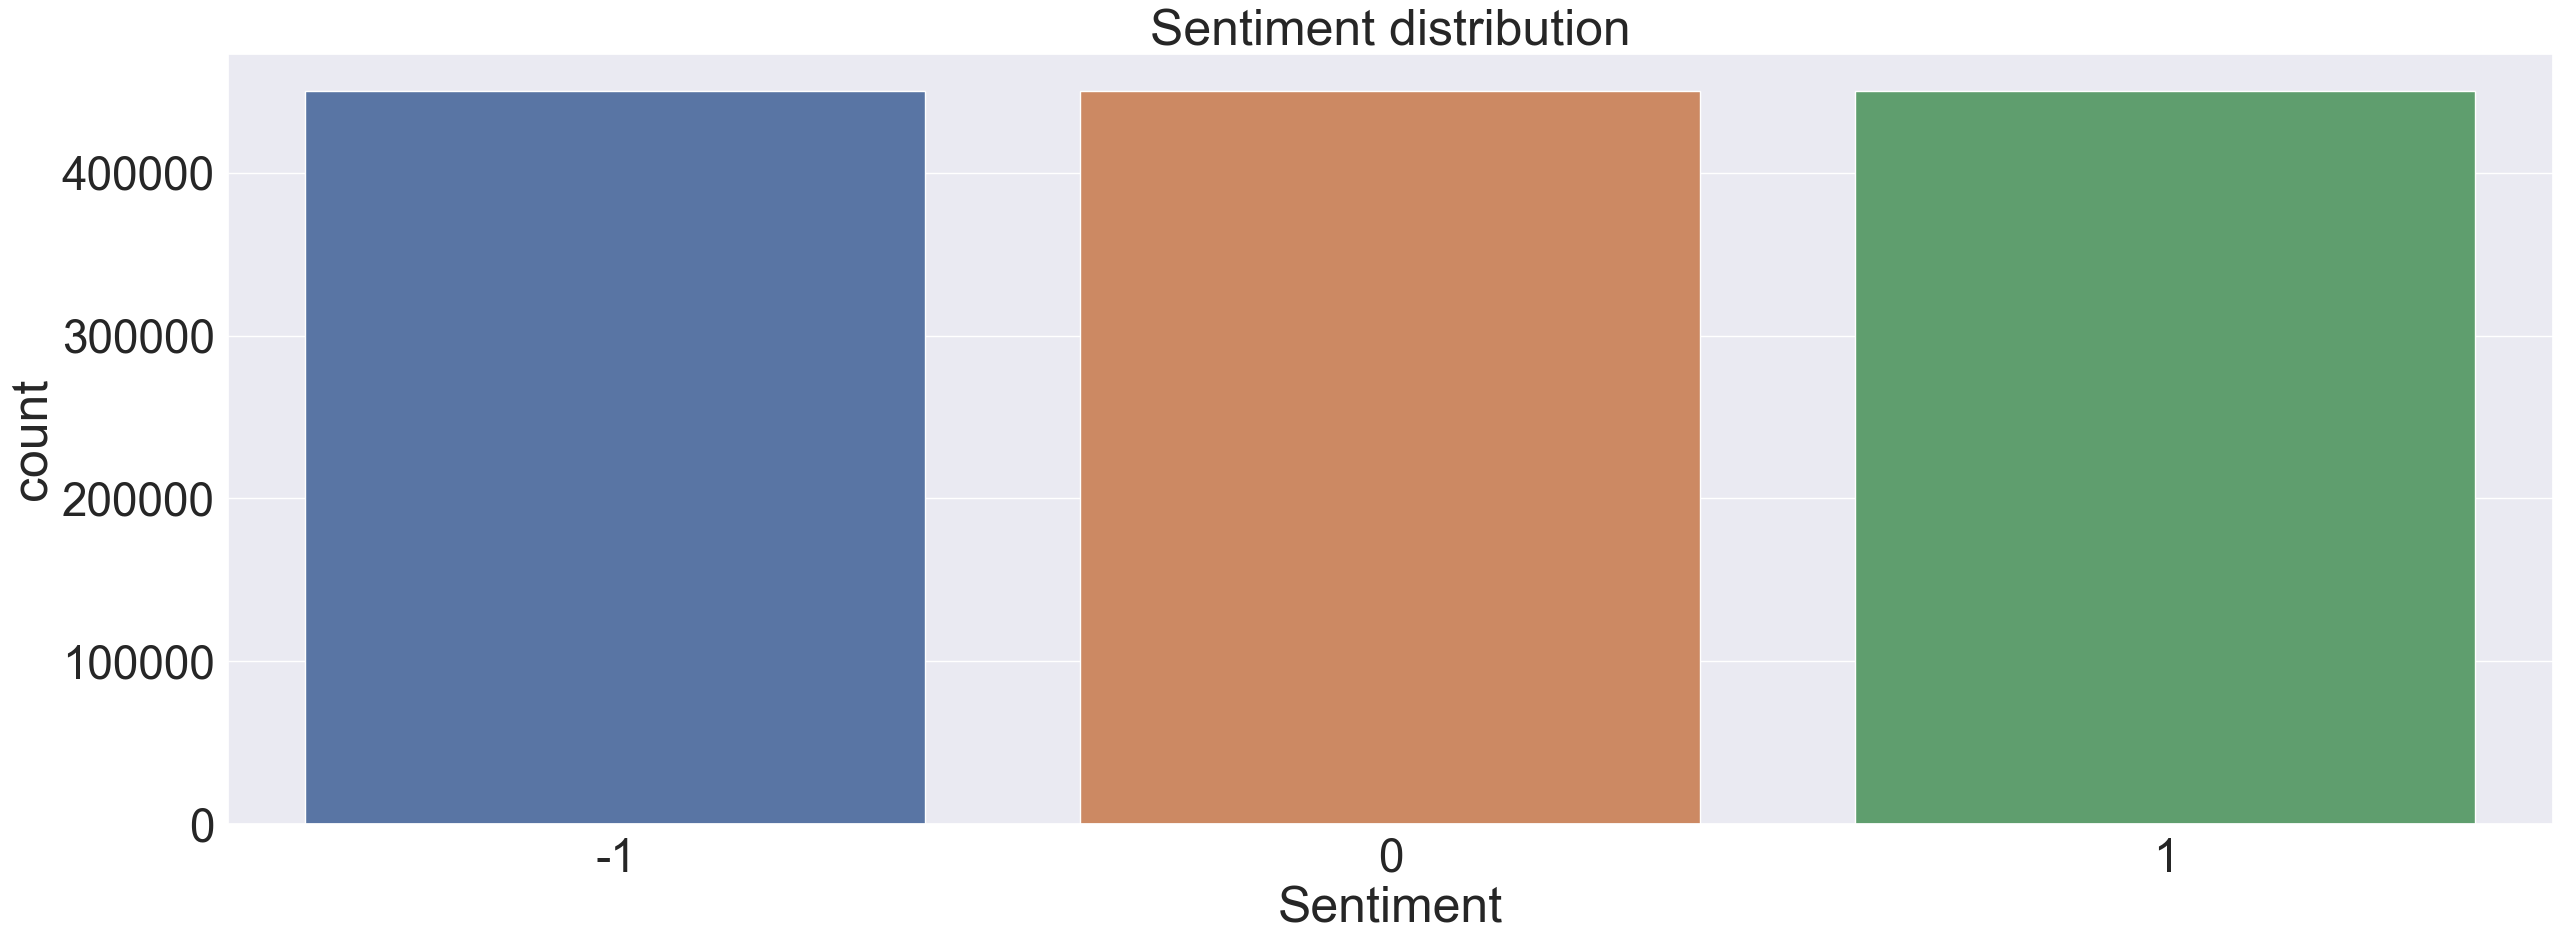

In [95]:

f = sns.countplot(x='Sentiment', data=full_df)
f.set_title("Sentiment distribution")
plt.xlabel("Sentiment");


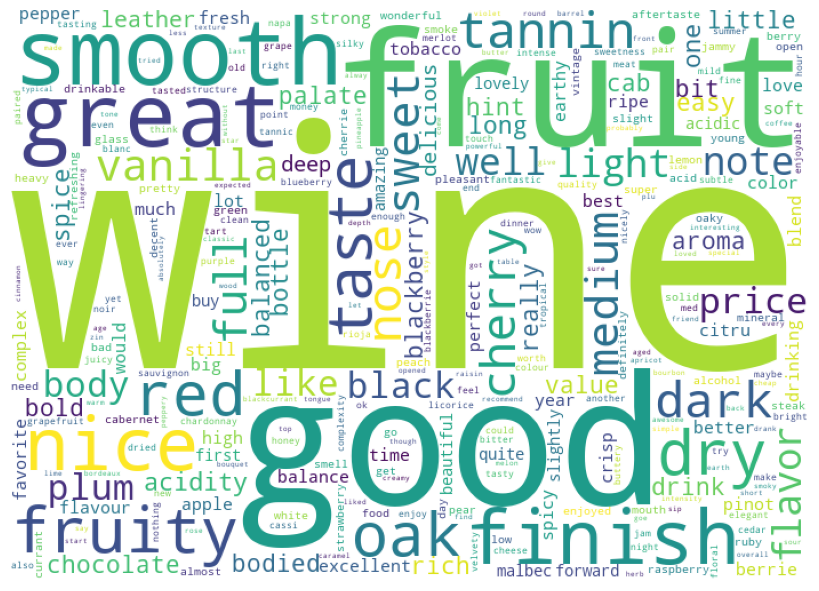

In [96]:
plot_wordcloud(full_df["Cleaned"])

 Multinomial Naive Bayes

In [97]:
from sklearn.model_selection import train_test_split

X, y  = full_df, full_df['Sentiment']
_X_train, _X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
X_train = _X_train['Tokenized']
X_test = _X_test['Tokenized']



In [98]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(np.array([-1,0,1]))
).fit(X_train.values, y_train.values)

In [224]:
y_hat = MNB.predict(X_test.values)

In [225]:
acc = np.sum(np.equal(y_test.values, y_hat)) / len(y_test)
acc

0.5616449175739415

In [226]:
class_report(y_test,y_hat)

              precision    recall  f1-score   support

          -1       0.62      0.64      0.63    135050
           0       0.46      0.38      0.42    135050
           1       0.58      0.66      0.62    135051

    accuracy                           0.56    405151
   macro avg       0.55      0.56      0.56    405151
weighted avg       0.55      0.56      0.56    405151



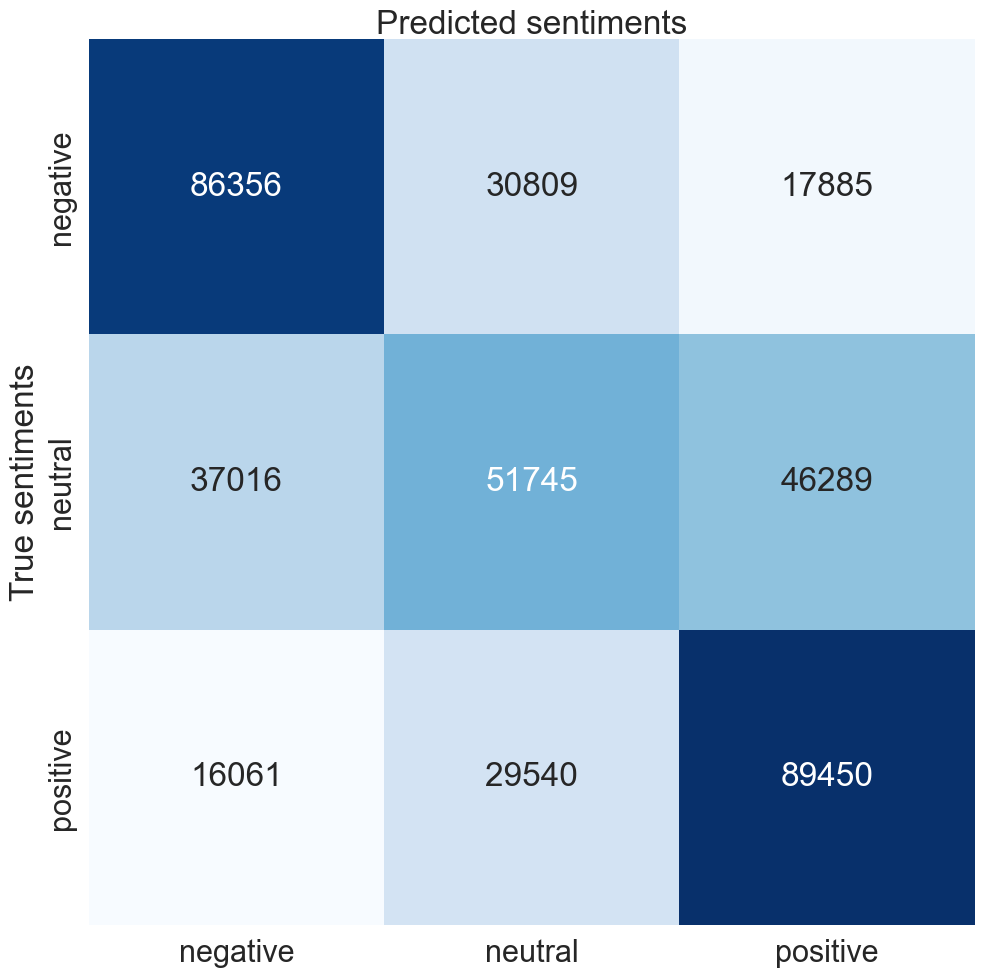

In [227]:
cnf_matrix(y_test,y_hat)


Clustering - Reviews Note

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(full_df['Tokenized'].astype("U"))

In [229]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [230]:
full_df['cluster'] = model.labels_

In [231]:
clusters = full_df.groupby('cluster')

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')
    print(full_df[full_df.cluster==i].Note.values[:3])
    print('------------')

Cluster centroids: 

Cluster 0:
 price
 good
 great
 wine
 point
 nice
 smooth
 worth
 value
 excellent
 fruity
 taste
 bad
 decent
 quality
------------
['Quite good for the price! I’ll definitely buy again. \n'
 'For the Price its good ' 'Fruity and juicy. Very good for the price']
------------
Cluster 1:
 sweet
 fruity
 little
 dry
 smooth
 good
 light
 taste
 wine
 nice
 slightly
 bit
 great
 like
 easy
------------
['Sweet and fruity. A great summer refresher '
 'Not as good as the 2016, a little sweet to start, and a little bitter at the finish. Maybe needs to age some more? '
 'Plum, slightly sweet, pleasant after-taste\n I quite enjoyed this one and would order another glass']
------------
Cluster 2:
 smooth
 wine
 fruity
 great
 nice
 dry
 light
 taste
 easy
 finish
 like
 drink
 bodied
 delicious
 flavor
------------
['my favorite Antinori!'
 'Nice - had with Sarah and Phil at Maggiano’s 3/2022'
 'Great value ... nicely balanced.']
------------
Cluster 3:
 oak
 cherry
 fruit


C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


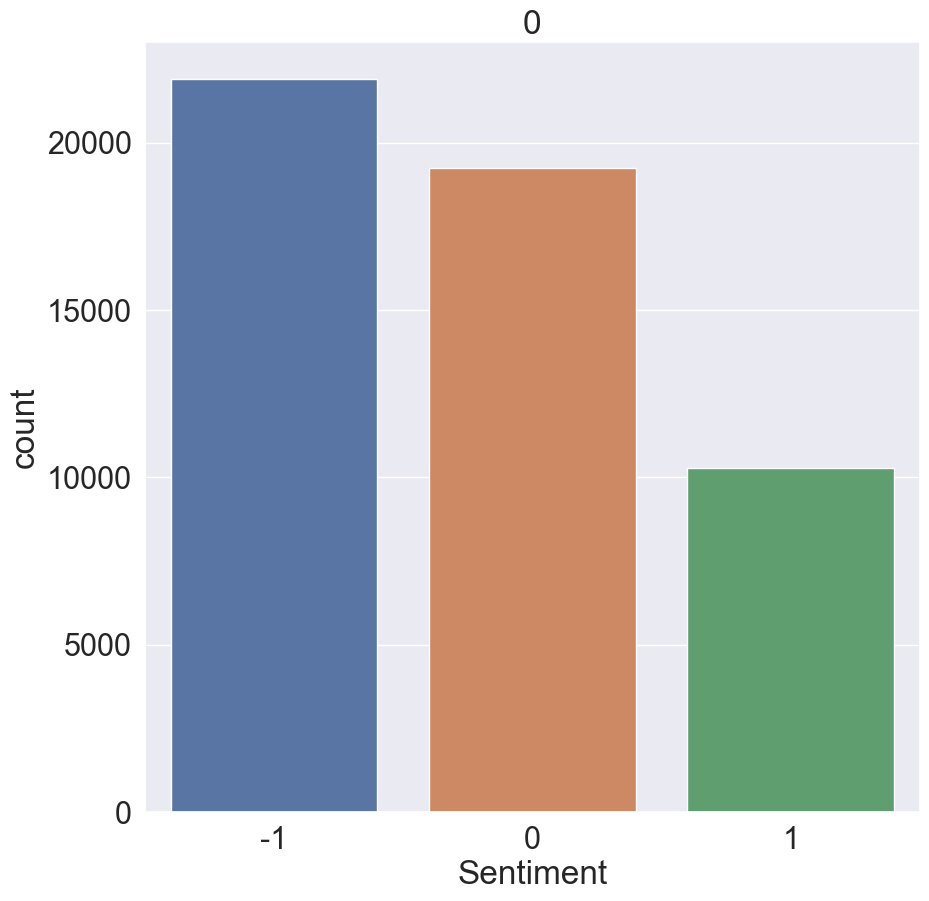

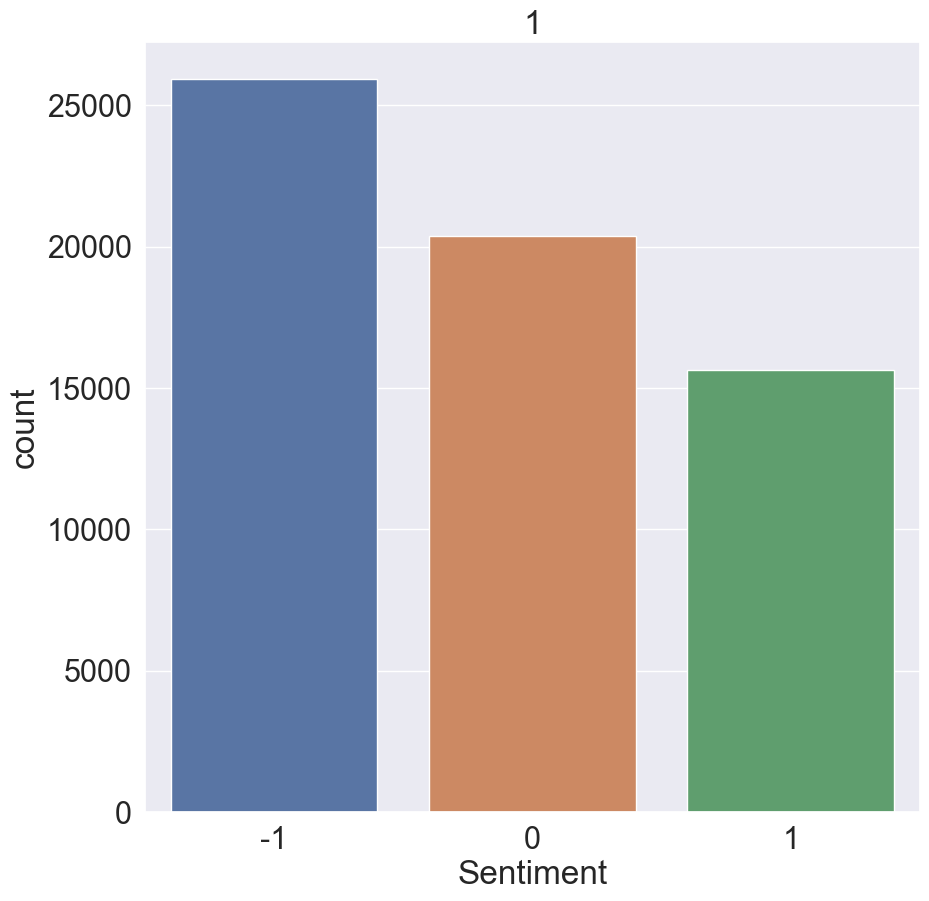

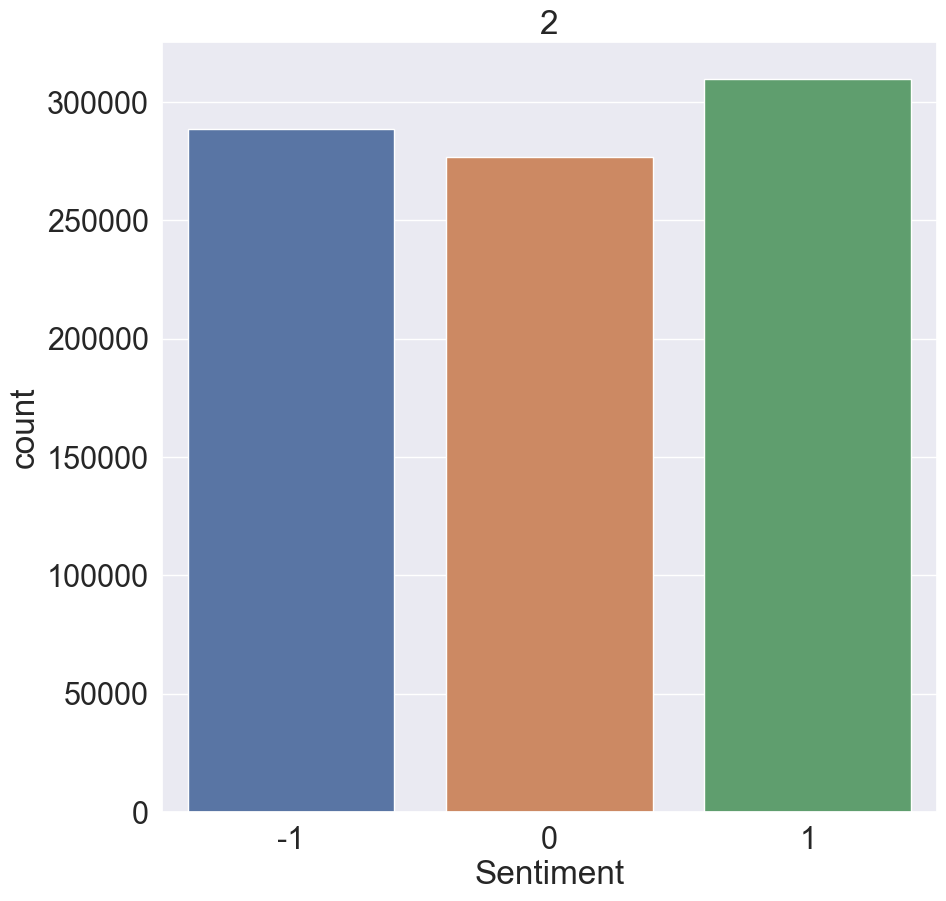

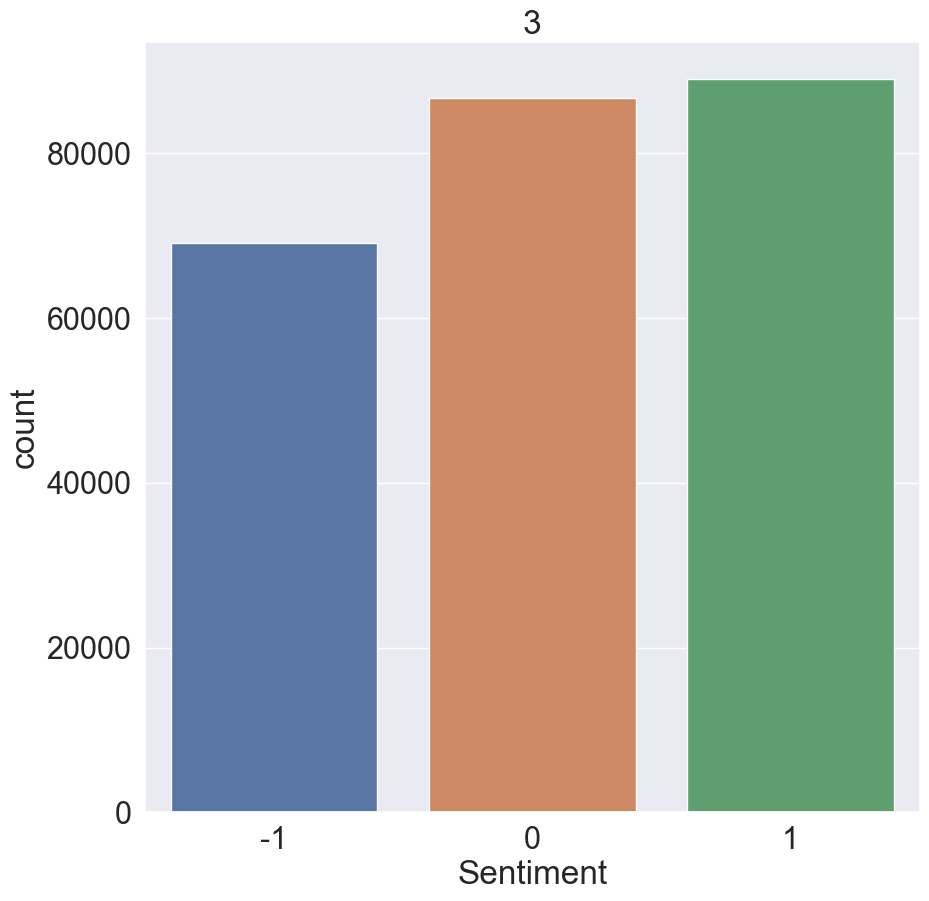

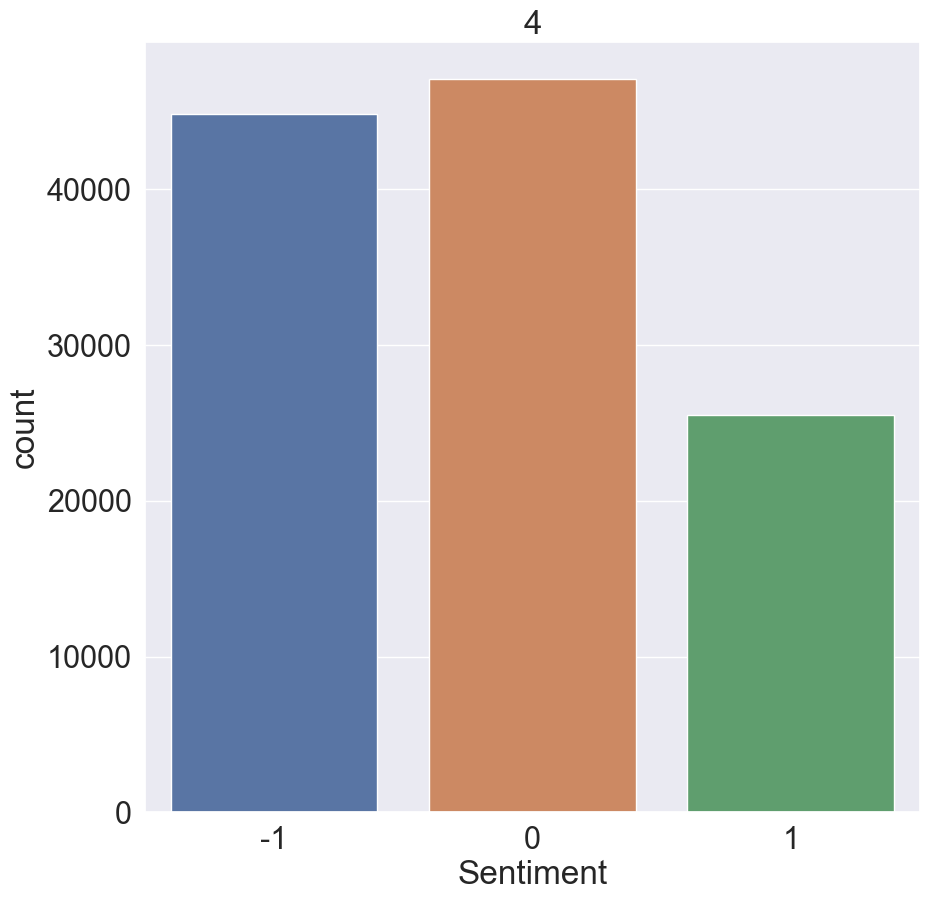

In [232]:
full_df
import seaborn as sns
for c in range(5):
  sns.countplot(x='Sentiment', data=full_df[full_df['cluster']==c]).set(title=c)
  plt.show()
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

In [233]:

"""
full_df[full_df.cluster==0].groupby(by="Sentiment").count()
full_df[full_df.cluster==1].groupby(by="Sentiment").count()
full_df[full_df.cluster==2].groupby(by="Sentiment").count()
full_df[full_df.cluster==3].groupby(by="Sentiment").count()
full_df[full_df.cluster==4].groupby(by="Sentiment").count()
"""

'\nfull_df[full_df.cluster==0].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==1].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==2].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==3].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==4].groupby(by="Sentiment").count()\n'

In [234]:
_X_test['PriceNote'] = _X_test.Note.apply(lambda f: data_processing.pick_only_key_sentence(f,'price'))
_X_test = _X_test[_X_test.astype(str)['PriceNote'] != '[]']

In [235]:
_X_test['PriceNote'] = _X_test.Note.apply(lambda f: data_processing.clean(f))
_X_test['PriceNote'] = _X_test.Note.apply(lambda f: data_processing.tokenize(f))

C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


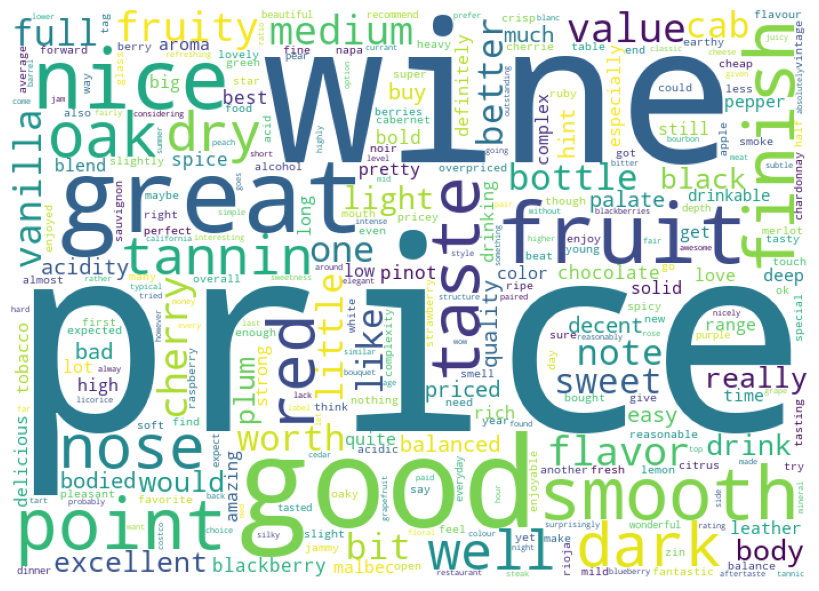

In [236]:
plot_wordcloud(_X_test.Cleaned)


In [237]:
y_hat_ = MNB.predict(_X_test.PriceNote.values)

In [238]:
acc = np.sum(np.equal(_X_test.Sentiment.values, y_hat_)) / len(_X_test.Sentiment.values)
acc


0.5237453565445408

In [239]:
class_report(_X_test.Sentiment.values,y_hat_)

              precision    recall  f1-score   support

          -1       0.55      0.78      0.64     11881
           0       0.47      0.33      0.39      9868
           1       0.50      0.34      0.40      5709

    accuracy                           0.52     27458
   macro avg       0.51      0.48      0.48     27458
weighted avg       0.51      0.52      0.50     27458



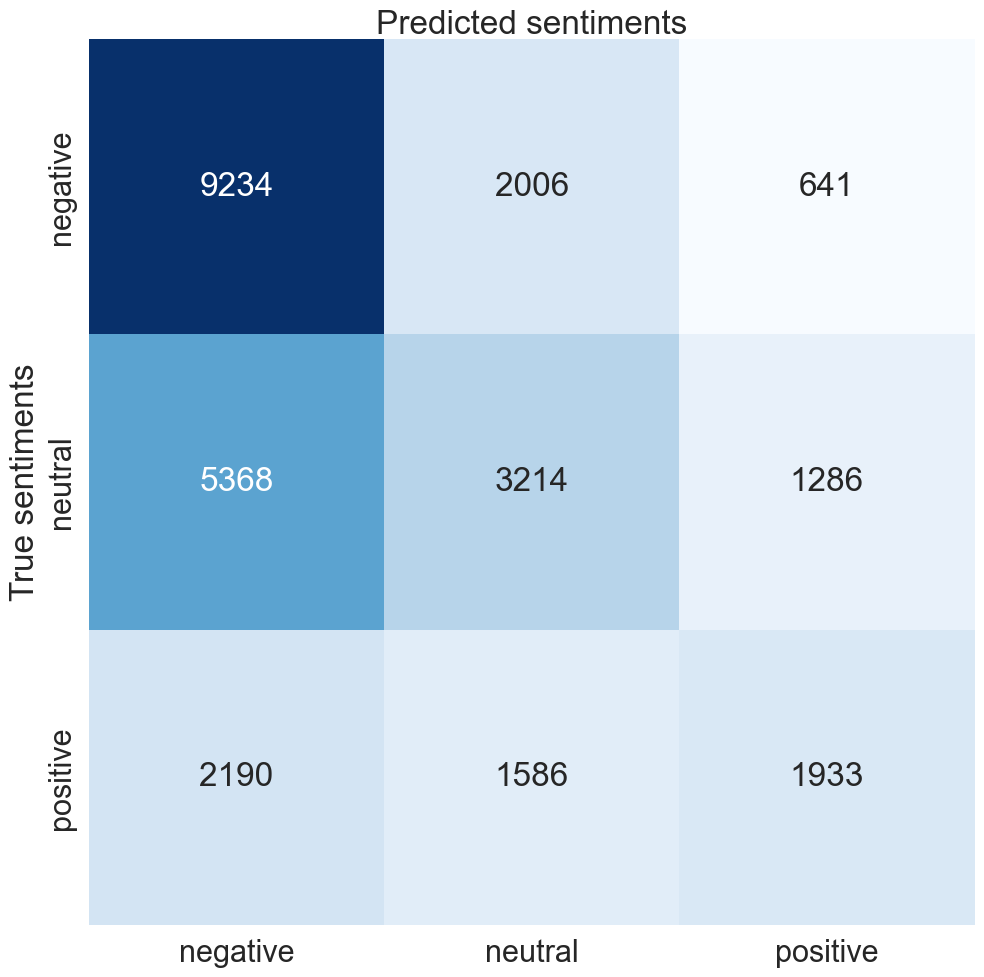

In [240]:
cnf_matrix(_X_test.Sentiment.values,y_hat_)

#_X_test['pred'] = y_hat_it

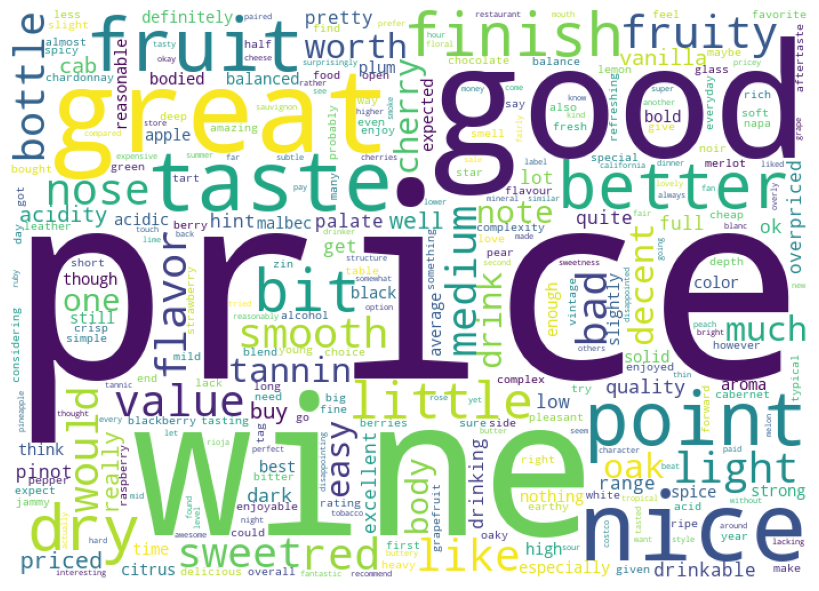

In [241]:
_X_test.groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,PriceNote,pred
Sentiment,,,,,,,,,,,,,,,,,
-1,11881,11711,11881,11881,11881,11881,11881,11881,11881,11881,11872,11881,11881,11881,11881,11881,11881
0,9868,9615,9868,9868,9868,9868,9868,9868,9868,9868,9862,9868,9868,9868,9868,9868,9868
1,5709,5512,5709,5709,5709,5709,5709,5709,5709,5709,5705,5709,5709,5709,5709,5709,5709


Clustering - User Bio

In [242]:
df = users_df
df['Bio'].replace('', np.nan, inplace=True)
df.dropna(subset=['Bio'], inplace=True)
df

,User,Bio,UserCountry,cluster
0,hellar.n,An arborist who just loves wine and pairing it...,estonia,6
1,martijn-kra,"Life is like wine, some are better at younger ...",netherlands,6
2,robin.fen,"Wine enthusiast, always on the lookout for new...",netherlands,6
5,joost_hee,Life is too short to drink bad \n(Voorkeur voo...,netherlands,7
6,mori.afshar,Wine is constant proof that God loves us and l...,netherlands,6
...,...,...,...,...
49257,martin_robe,Wset Level 1,united-kingdom,0
49260,bruces1,AM coffee snob PM wine snob,united-states,6
49271,tacyk,"Working class mom, tasting wines $10-$18 and t...",united-states,6
49284,leonardo-biag,:-),italy,6


In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['Bio'].astype("U"))

In [244]:
k = 8
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_init=1)

In [245]:
df['cluster'] = model.labels_
clusters = df.groupby('cluster')


In [173]:
df.groupby(by='UserCountry').count()
users_reviews_count = df.pivot_table(columns=['UserCountry'], aggfunc='size')
users_reviews_count = users_reviews_count.sort_values(ascending=False)
users_reviews_count.index[:24]

Index(['united-states', 'united-kingdom', 'canada', 'netherlands',
       'south-africa', 'australia', 'denmark', 'brazil', 'norway', 'germany',
       'sweden', 'belgium', 'finland', 'poland', 'ireland', 'spain',
       'switzerland', 'russia', 'italy', 'japan', 'singapore', 'france',
       'portugal', 'new-zealand'],
      dtype='object', name='UserCountry')

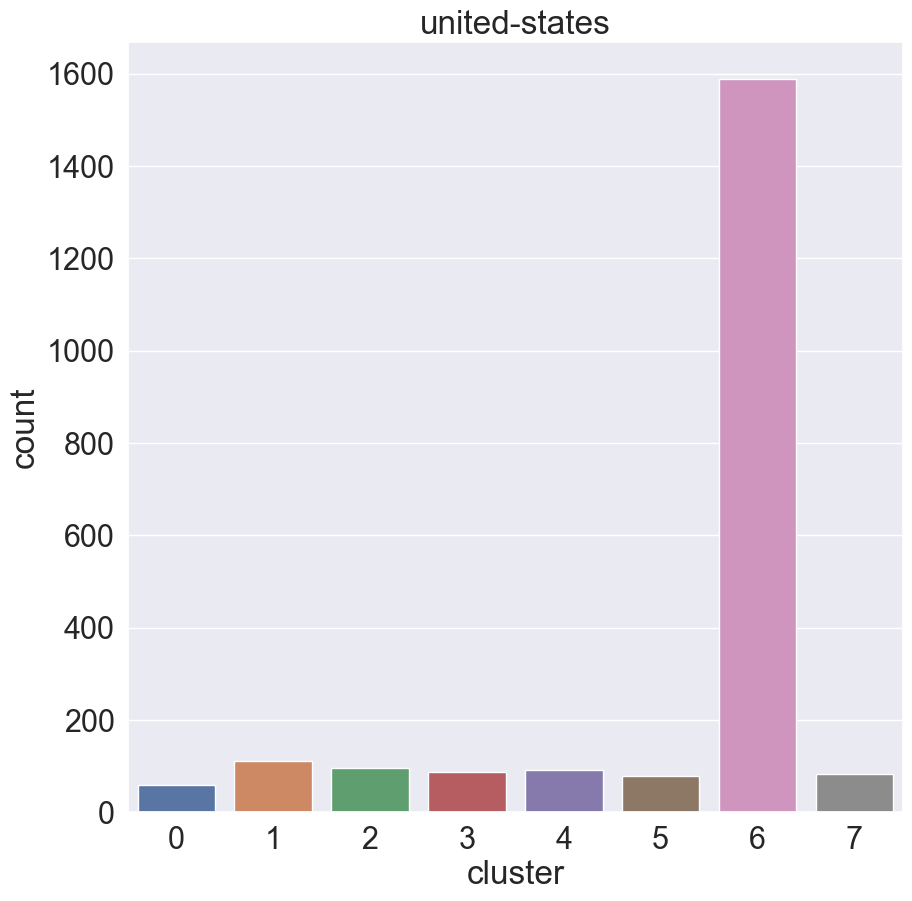

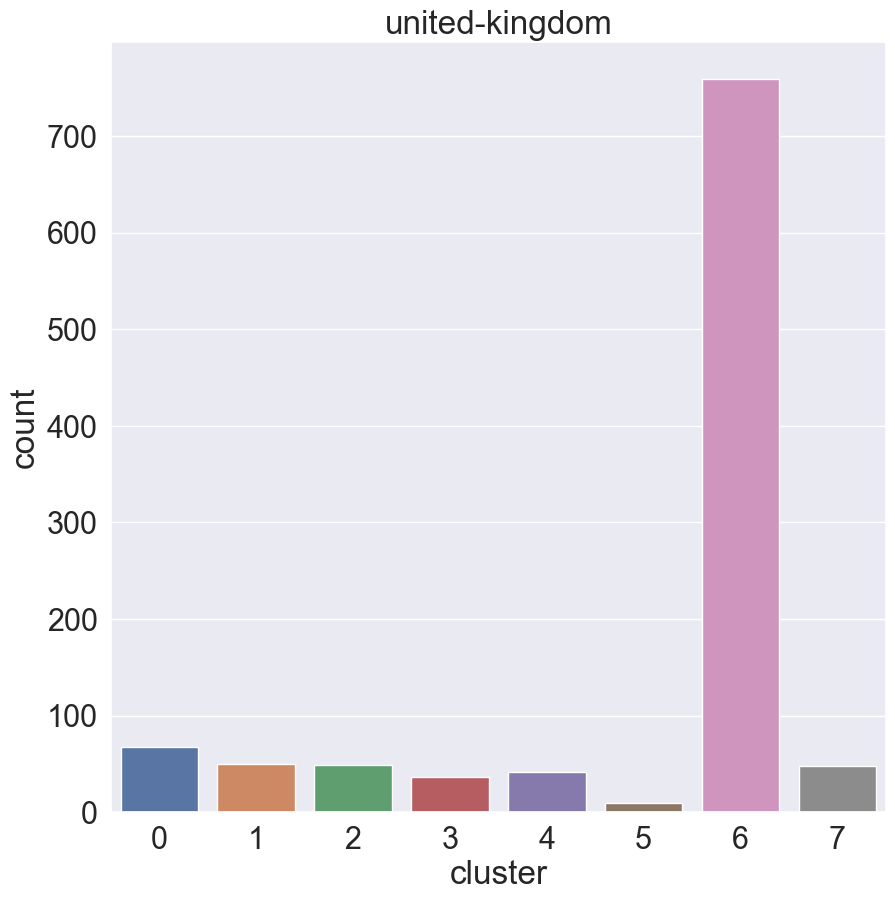

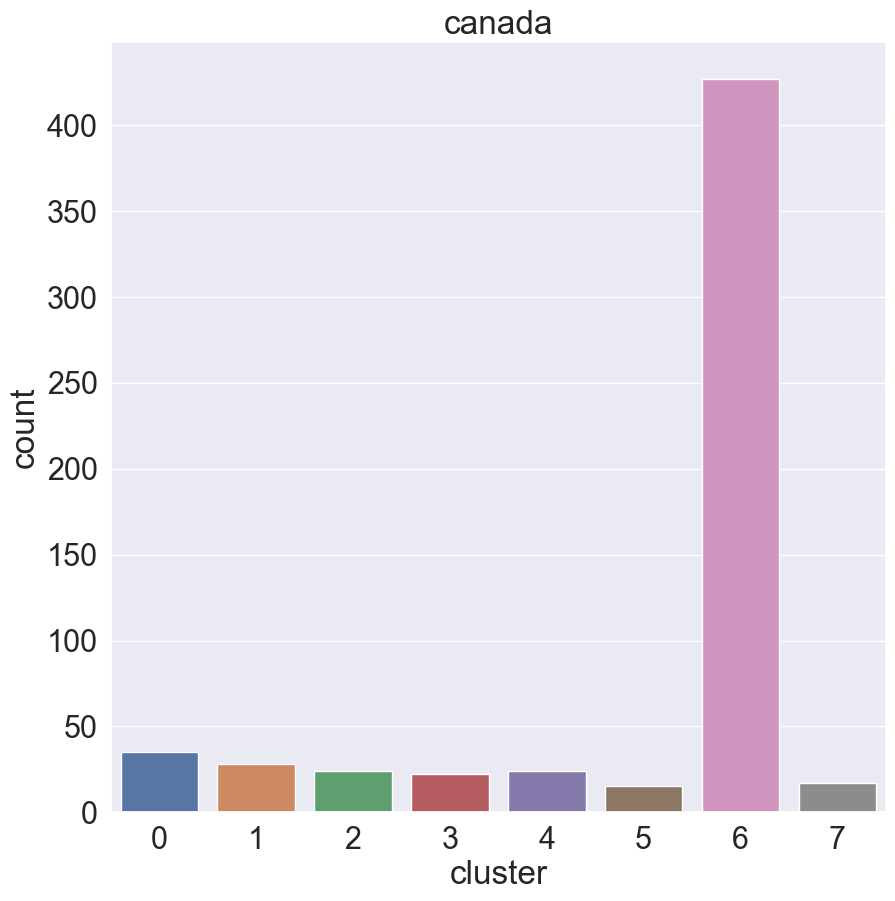

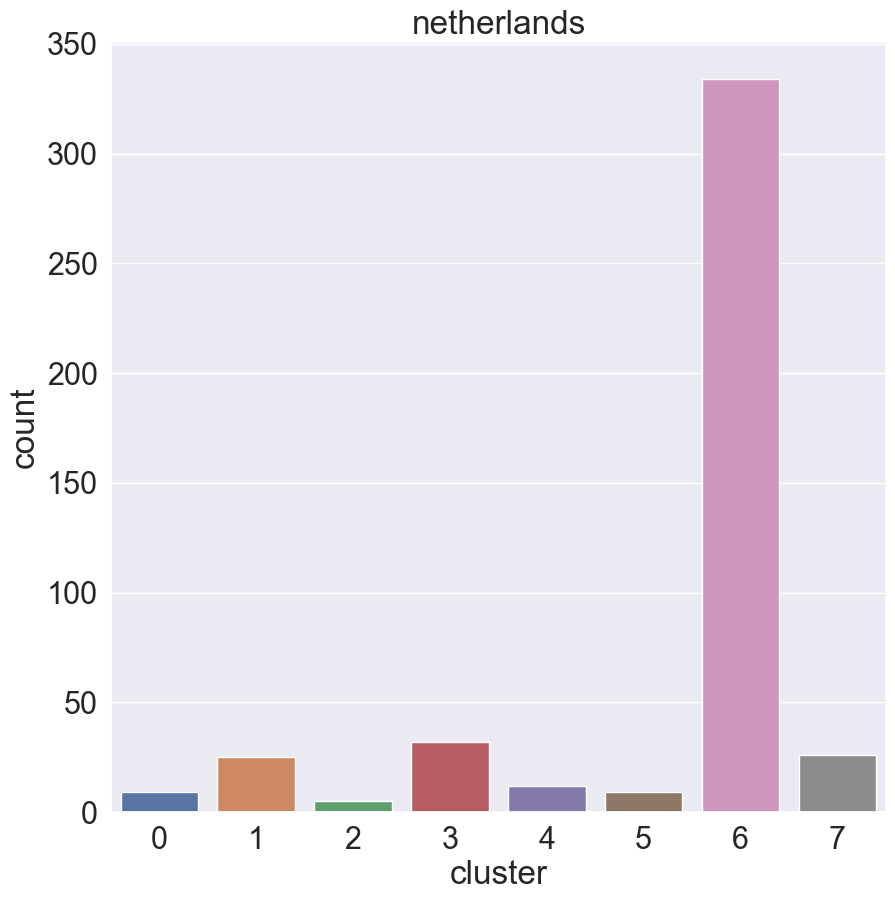

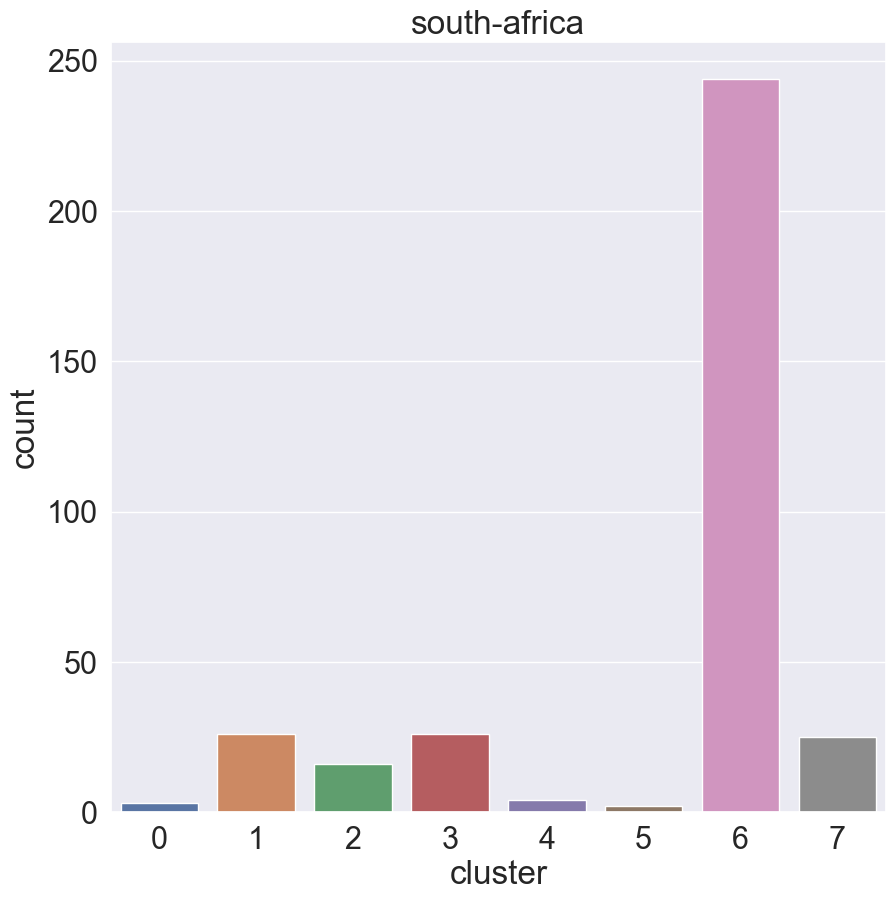

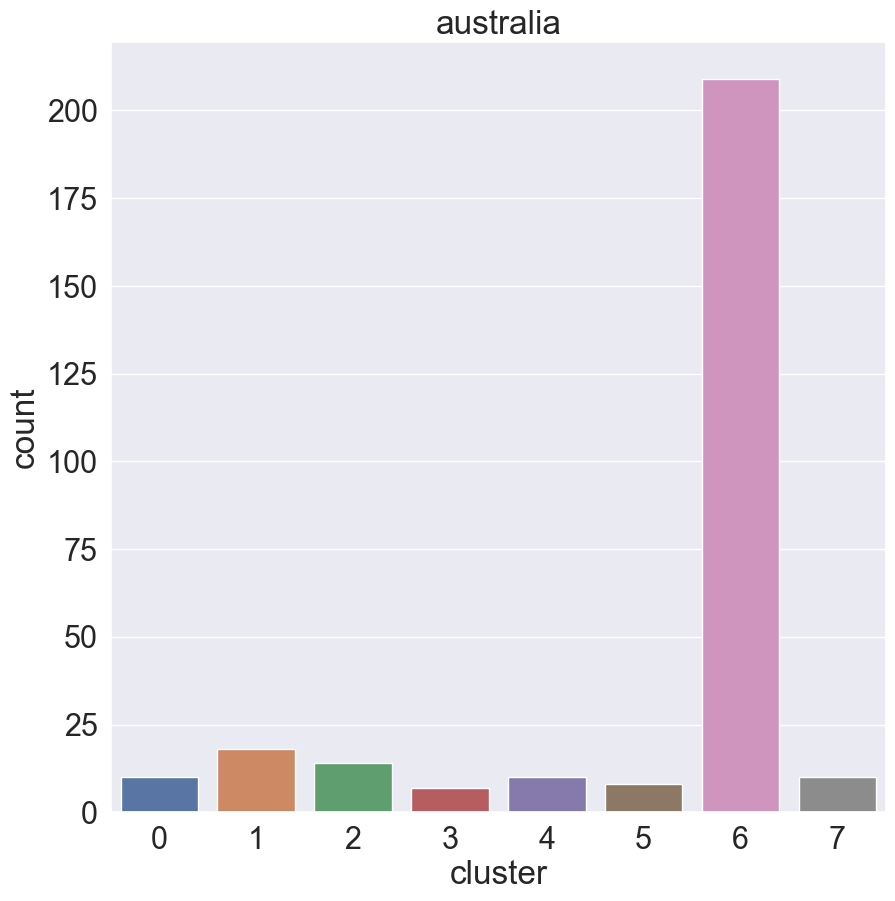

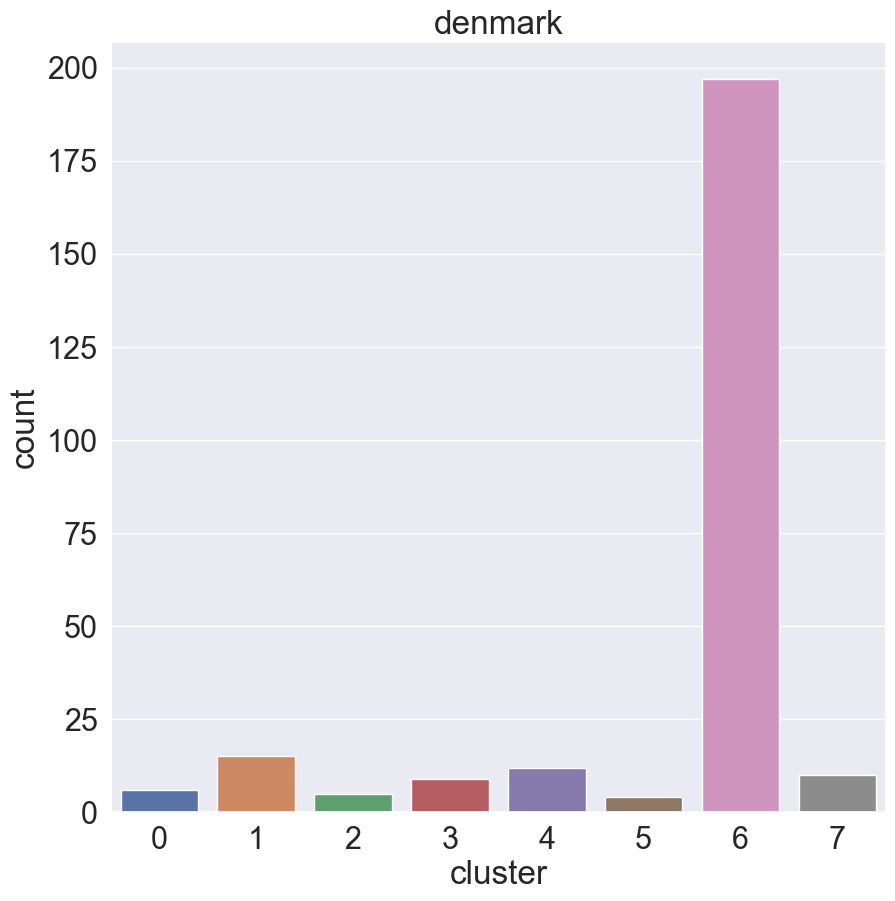

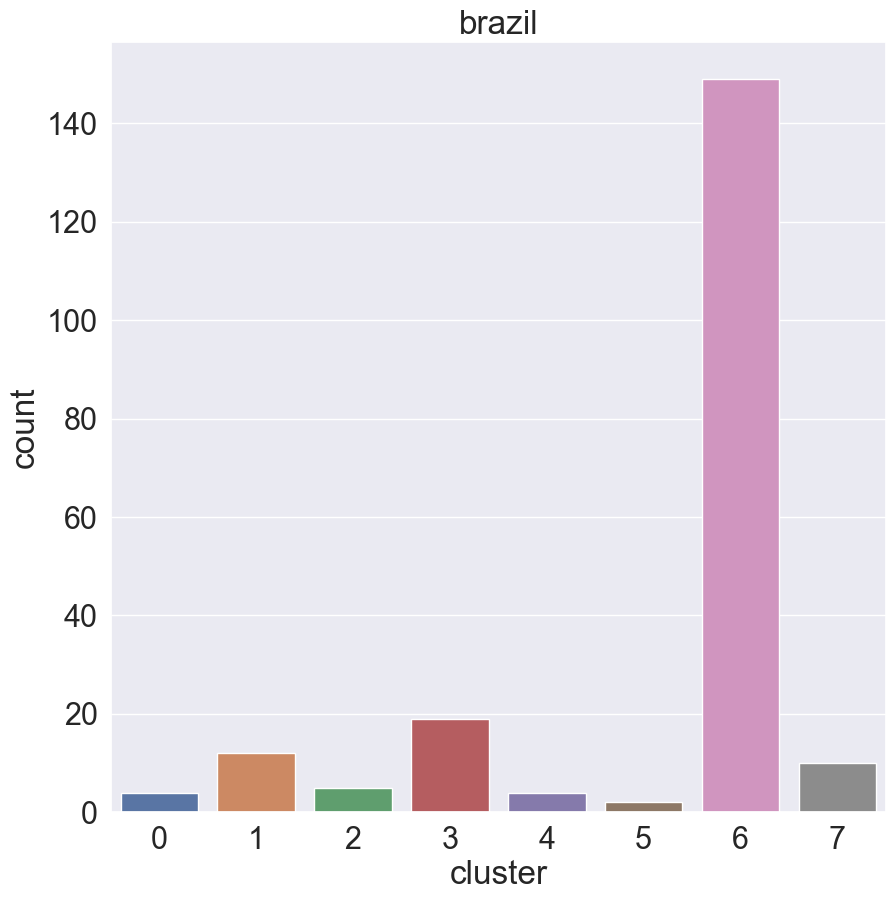

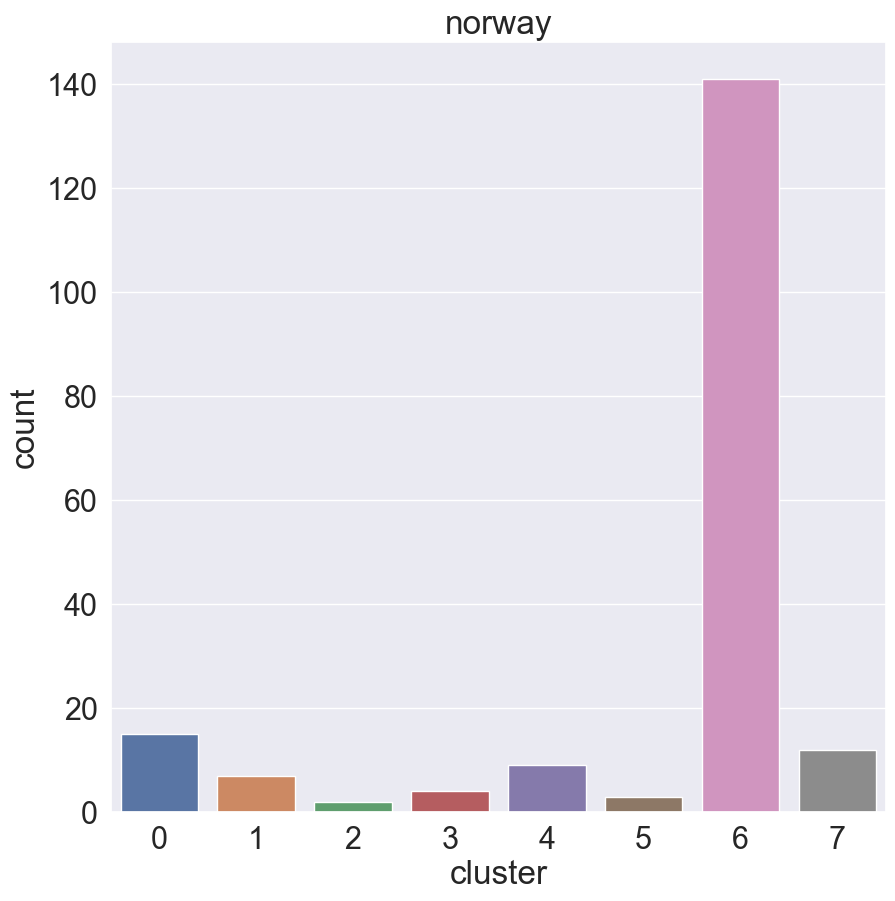

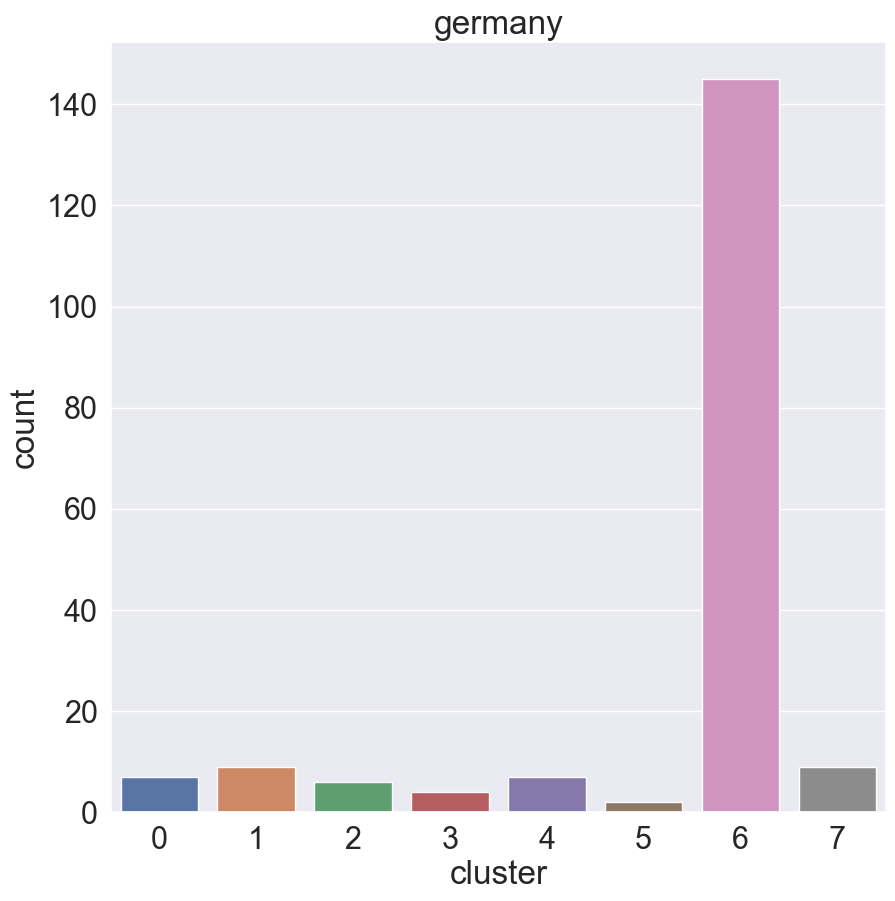

In [174]:
for c in users_reviews_count.index[:10]:
  sns.countplot(x='cluster', data=df[df['UserCountry']==c]).set(title=c)
  plt.show()
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

In [178]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')
    print(df[df.cluster == i].Bio.values[0])
    print('------------')

Cluster centroids: 

Cluster 0:
 wset
 level
 distinction
 certified
 wine
 enthusiast
 diploma
 student
 wines
 award
------------
ONAV, WSET-2
------------
Cluster 1:
 good
 wine
 food
 love
 wines
 life
 friends
 enjoy
 like
 lover
------------
"Good wine makes good blood / Buon vino fa buon sangue"
------------
Cluster 2:
 drinking
 bottle
 wine
 just
 learning
 time
 love
 like
 enjoying
 wines
------------
My ratings are based on how a bottle went down...not a tasting glass. 
------------
Cluster 3:
 lover
 wine
 food
 amateur
 drinker
 just
 red
 enthusiast
 italian
 things
------------
Wine lover, WSET2
------------
Cluster 4:
 world
 wine
 exploring
 old
 wines
 new
 time
 glass
 bottle
 tasting
------------
Exploring the wonderful world of wine. (WSET® 3). 
------------
Cluster 5:
 sommelier
 certified
 wine
 ais
 wset
 lover
 level
 master
 conseil
 manager
------------
Sommelier , wine importer,  wine lover.
------------
Cluster 6:
 wine
 wines
 love
 enthusiast
 like
 vino

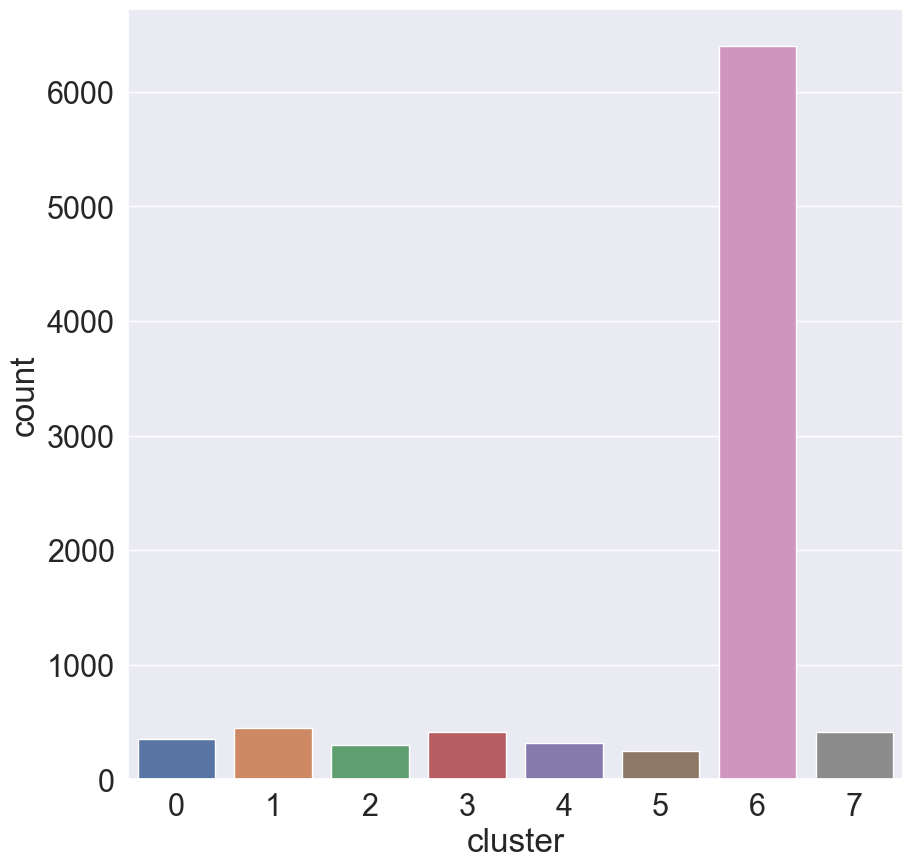

In [176]:
sns.countplot(x='cluster', data=df)
plt.show()

In [180]:
print(df[df.cluster == 6].Bio.values[:10
])


['An arborist who just loves wine and pairing it with food.'
 'Life is like wine, some are better at younger age others blossoming when they are older.'
 'Wine enthusiast, always on the lookout for new discoveries. WSET 3 certified.'
 'Wine is constant proof that God loves us and loves to see us happy- Benjamin Franklin'
 'Wine is sunlight held together by water!\n  Galileo Gallilei'
 'Love wine 🥂. Love Food 🍲. Love them together the most 🍷🍴.'
 'Die Guten ins Kröpfchen - die Schlechten ins Töpfchen 😉\nI consider the price (+/- 0,2-0,5⭐️)'
 'Wine friendly amateur, pursuing hedonistic experiences.'
 'Never drink the same wine, there are so many different wines. Try something different!'
 'Conscious pleasure\n']
